In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras import backend as K
import keras
from sklearn.model_selection import train_test_split
from numpy import mean
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from matplotlib import cm
from scipy.stats import ks_2samp







# Load data
data=pd.read_csv('findata.csv')
solid_data = data.copy(deep = False)

R=data["Put_Prices"]


In [ ]:
time = 1
simulations = 1000
period = 50

In [ ]:
# Spliting data into Feature and
X=data[['Stock_Prices', 'Implied_Volatility', 'Strike_Prices', 'Dividend_Yield', 'Maturity', 'Moneyness','Interest_Rates' ]]
y=data['Put_Prices']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=True)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size = 0.2, shuffle=True)

In [ ]:
def evaluate_model(num_units):
  ann1 = tf.keras.models.Sequential()
  ann1.add(tf.keras.layers.Dense(units=num_units, activation='leaky_relu'))
  ann1.add(tf.keras.layers.Dense(units=1))
  ann1.compile(optimizer = 'adam', loss = 'mean_squared_error',metrics=['mean_squared_error'])
  model_n1 = ann1.fit(X_train, y_train, batch_size = 32, epochs = 200,validation_data=(X_val, y_val),
              shuffle=True,verbose = 0)
  test_mse = model_n1.history['loss'][-50:]

  return test_mse

In [ ]:
results = list()
def repeated_evaluation(start, finish,results):
  for i in range(start-1,finish):
    test_mse = evaluate_model(i)
    results.append(test_mse)
  return results

In [ ]:
results_new = repeated_evaluation(3,10,results)

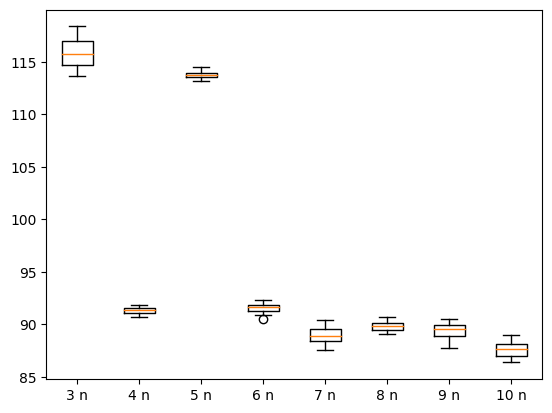

In [ ]:
labels = ['3 n', '4 n', '5 n','6 n',
          '7 n', '8 n','9 n', '10 n']
pyplot.boxplot(results_new,labels=labels)
pyplot.show()

In [ ]:
optimizer = keras.optimizers.Adam(learning_rate=0.005)

ann1 = tf.keras.models.Sequential()
ann1.add(tf.keras.layers.Dense(units=9, activation='leaky_relu'))
ann1.add(tf.keras.layers.Dense(units=1))
ann1.compile(optimizer = optimizer, loss = 'mean_squared_error',metrics=['mean_squared_error'])
model_n1 = ann1.fit(X_train, y_train, batch_size = 32, epochs = 200,validation_data=(X_val, y_val),
              shuffle=True,verbose = 0)

In [ ]:
ann2 = tf.keras.models.Sequential()
ann2.add(tf.keras.layers.Dense(units=16, activation='leaky_relu'))
ann2.add(tf.keras.layers.Dense(units=8, activation='leaky_relu'))
ann2.add(tf.keras.layers.Dense(units=4, activation='leaky_relu'))
ann2.add(tf.keras.layers.Dense(units=1, activation='leaky_relu'))
ann2.compile(optimizer = optimizer, loss = 'mean_squared_error',metrics=['mean_squared_error'])
model_n2 = ann2.fit(X_train, y_train, batch_size = 64, epochs = 300,validation_data=(X_val, y_val),
              shuffle=True,verbose=0)

In [ ]:
stock_prices_train = X_train['Stock_Prices']
implied_volatility_train = X_train['Implied_Volatility']
strike_prices_train = X_train['Strike_Prices']
dividend_yield_train = X_train['Dividend_Yield']
maturity_train = X_train['Maturity']
moneyness_train = X_train['Moneyness']
Interest_Rates_train = X_train['Interest_Rates']

put_prices_train = y_train

stock_prices_test = X_test['Stock_Prices']
implied_volatility_test = X_test['Implied_Volatility']
strike_prices_test = X_test['Strike_Prices']
dividend_yield_test = X_test['Dividend_Yield']
maturity_test = X_test['Maturity']
moneyness_test = X_test['Moneyness']
Interest_Rates_test = X_test['Interest_Rates']

put_prices_test = y_test


In [ ]:
X_train, X_test, y_train, y_test
# kolmogorov test


np.random.seed(12345678)
print("Put_Prices: ", ks_2samp(put_prices_test, put_prices_train))
print("Stock_Prices: ", ks_2samp(stock_prices_test, stock_prices_train))
print("Implied_Volatility: ", ks_2samp(implied_volatility_test, implied_volatility_train))
print("Strike_Prices: ", ks_2samp(strike_prices_test, strike_prices_train))
print("Maturity: ", ks_2samp(maturity_test, maturity_train))
print("Moneyness: ", ks_2samp(moneyness_test, moneyness_train))
print("Interest Rates: ", ks_2samp(Interest_Rates_test, Interest_Rates_train))




Put_Prices:  KstestResult(statistic=0.014326365653331452, pvalue=0.3602499149752024, statistic_location=2.560223297748047, statistic_sign=-1)
Stock_Prices:  KstestResult(statistic=0.01595432708258171, pvalue=0.24031220668943365, statistic_location=123.44821485269348, statistic_sign=-1)
Implied_Volatility:  KstestResult(statistic=0.014123331266443884, pvalue=0.37759199600353976, statistic_location=0.0616468154021495, statistic_sign=-1)
Strike_Prices:  KstestResult(statistic=0.013873190190012319, pvalue=0.399663659884134, statistic_location=115.0, statistic_sign=-1)
Maturity:  KstestResult(statistic=0.018664852566548706, pvalue=0.11050444224712042, statistic_location=201.0, statistic_sign=1)
Moneyness:  KstestResult(statistic=0.012543451074846057, pvalue=0.5288265335120061, statistic_location=0.9751156000890756, statistic_sign=1)
Interest Rates:  KstestResult(statistic=0.017231514750294052, pvalue=0.1692582032185399, statistic_location=0.2241009189346077, statistic_sign=-1)


<function matplotlib.pyplot.show(close=None, block=None)>

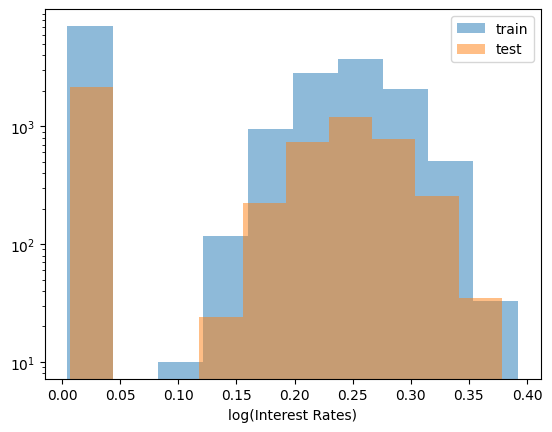

In [ ]:
pyplot.yscale('log')
pyplot.hist(Interest_Rates_train, alpha=.5, label='train')
pyplot.hist(Interest_Rates_test, alpha=.5, label='test')
plt.xlabel('log(Interest Rates)')
pyplot.legend()
pyplot.show

<function matplotlib.pyplot.show(close=None, block=None)>

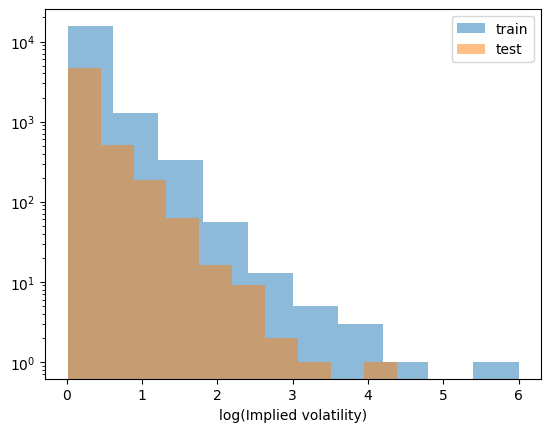

In [ ]:
pyplot.yscale('log')
pyplot.hist(implied_volatility_train, alpha=.5, label='train')
pyplot.hist(implied_volatility_test, alpha=.5, label='test')
plt.xlabel('log(Implied volatility)')
pyplot.legend()
pyplot.show

<function matplotlib.pyplot.show(close=None, block=None)>

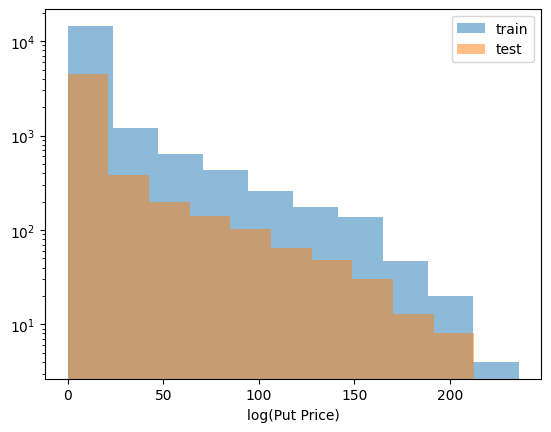

In [ ]:
pyplot.yscale('log')
pyplot.hist(put_prices_train, alpha=.5, label='train')
pyplot.hist(put_prices_test, alpha=.5, label='test')
plt.xlabel('log(Put Price)')
pyplot.legend()
pyplot.show

<function matplotlib.pyplot.show(close=None, block=None)>

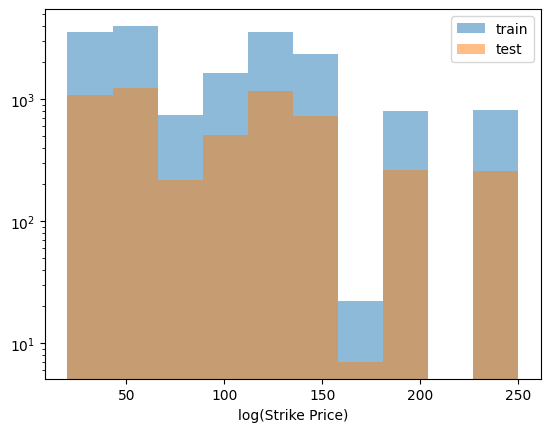

In [ ]:
pyplot.yscale('log')
pyplot.hist(strike_prices_train, alpha=.5, label='train')
pyplot.hist(strike_prices_test, alpha=.5, label='test')
plt.xlabel('log(Strike Price)')
pyplot.legend()
pyplot.show

<function matplotlib.pyplot.show(close=None, block=None)>

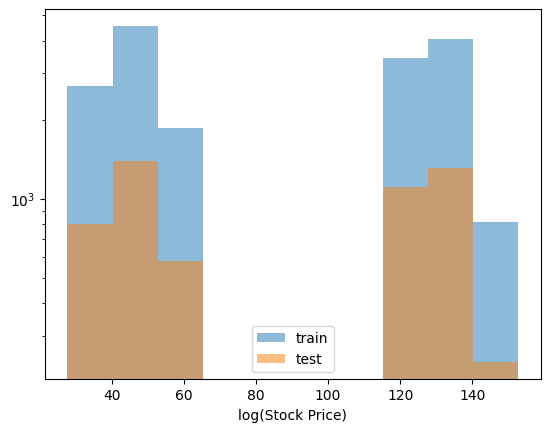

In [ ]:
pyplot.yscale('log')
pyplot.hist(stock_prices_train, alpha=.5, label='train')
pyplot.hist(stock_prices_test, alpha=.5, label='test')
plt.xlabel('log(Stock Price)')
pyplot.legend()
pyplot.show

<function matplotlib.pyplot.show(close=None, block=None)>

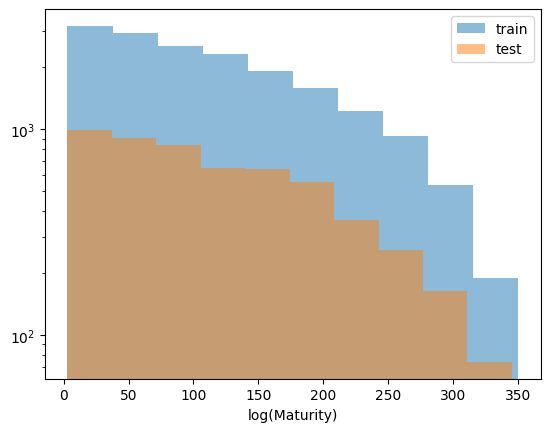

In [ ]:
pyplot.hist(maturity_train, alpha=.5, label='train')
pyplot.hist(maturity_test, alpha=.5, label='test')
plt.xlabel('log(Maturity)')
pyplot.yscale('log')
pyplot.legend()
pyplot.show

<function matplotlib.pyplot.show(close=None, block=None)>

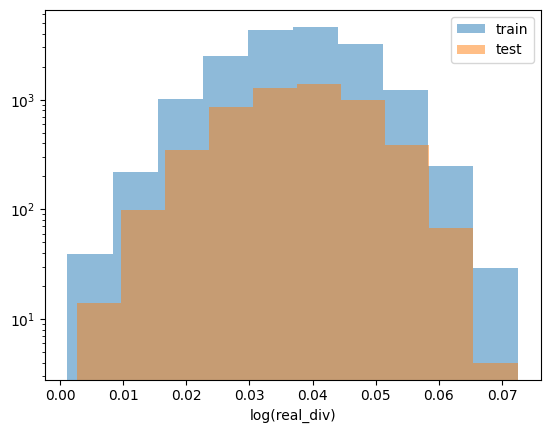

In [ ]:
pyplot.yscale('log')
pyplot.hist(dividend_yield_train, alpha=.5, label='train')
pyplot.hist(dividend_yield_test, alpha=.5, label='test')
plt.xlabel('log(real_div)')
pyplot.legend()
pyplot.show

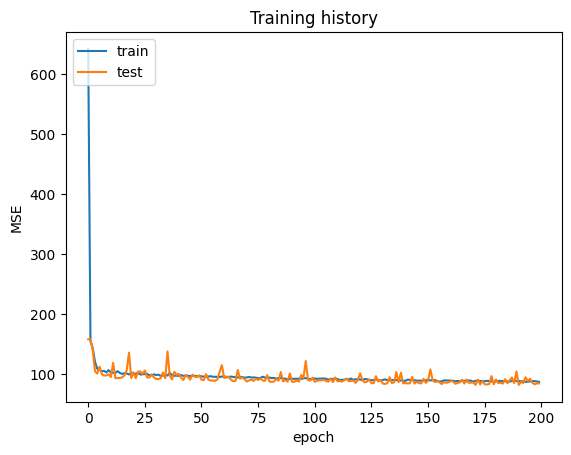

In [ ]:

plt.plot(model_n1.history['loss'])
plt.plot(model_n1.history['val_loss'])
plt.title('Training history')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

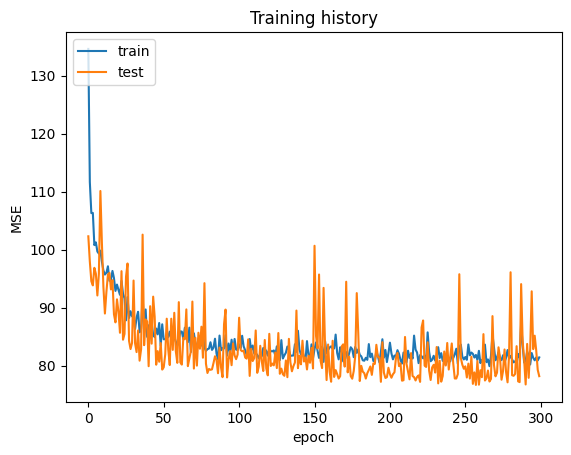

In [ ]:
plt.plot(model_n2.history['loss'])
plt.plot(model_n2.history['val_loss'])
plt.title('Training history')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#LSM

In [ ]:
# Extract the required features from the dataset
stock_prices = X['Stock_Prices']
implied_volatility = X['Implied_Volatility']
strike_prices = X['Strike_Prices']
dividend_yield = X['Dividend_Yield']
maturity = X['Maturity']
moneyness = X['Moneyness']
Interest_Rates = X['Interest_Rates']

In [ ]:

class AmericanOptionsLSMC(object):

    def __init__(self, option_type, S0, strike, T, M, r, div, sigma, simulations):
        try:
            self.option_type = option_type
            assert isinstance(option_type, str)
            self.S0 = float(S0)
            self.strike = float(strike)
            assert T > 0
            self.T = float(T)
            assert M > 0
            self.M = int(M)
            assert r >= 0
            self.r = float(r)
            assert div >= 0
            self.div = float(div)
            assert sigma > 0
            self.sigma = float(sigma)
            assert simulations > 0
            self.simulations = int(simulations)
        except ValueError:
            print('Error passing Options parameters')


        if option_type != 'call' and option_type != 'put':
            raise ValueError("Error: option type not valid. Enter 'call' or 'put'")
        if S0 < 0 or strike < 0 or T <= 0 or r < 0 or div < 0 or sigma < 0:
            raise ValueError('Error: Negative inputs not allowed')

        self.time_unit = self.T / float(self.M)
        self.discount = np.exp(-self.r * self.time_unit)

    @property
    def MCprice_matrix(self, seed = 123):
        """ Returns MC price matrix rows: time columns: price-path simulation """
        np.random.seed(seed)
        MCprice_matrix = np.zeros((self.M + 1, self.simulations), dtype=np.float64)
        MCprice_matrix[0,:] = self.S0
        for t in range(1, self.M + 1):
            brownian = np.random.standard_normal( self.simulations // 2)
            brownian = np.concatenate((brownian, -brownian))
            MCprice_matrix[t, :] = (MCprice_matrix[t - 1, :]
                                  * np.exp((self.r - self.sigma ** 2 / 2.) * self.time_unit
                                  + self.sigma * brownian * np.sqrt(self.time_unit)))
        return MCprice_matrix

    @property
    def MCpayoff(self):
        """Returns the inner-value of American Option"""
        if self.option_type == 'call':
            payoff = np.maximum(self.MCprice_matrix - self.strike,
                           np.zeros((self.M + 1, self.simulations),dtype=np.float64))
        else:
            payoff = np.maximum(self.strike - self.MCprice_matrix,
                            np.zeros((self.M + 1, self.simulations),
                            dtype=np.float64))
        return payoff
    @property
    def value_vector(self):
        value_matrix = np.zeros_like(self.MCpayoff)
        value_matrix[-1, :] = self.MCpayoff[-1, :]
        for t in range(self.M - 1, 0 , -1):
            regression = np.polyfit(self.MCprice_matrix[t, :], value_matrix[t + 1, :] * self.discount, 5)
            continuation_value = np.polyval(regression, self.MCprice_matrix[t, :])
            value_matrix[t, :] = np.where(self.MCpayoff[t, :] > continuation_value,
                                          self.MCpayoff[t, :],
                                          value_matrix[t + 1, :] * self.discount)

        return value_matrix[1,:] * self.discount


    @property
    def price(self): return np.sum(self.value_vector) / float(self.simulations)

In [ ]:
y_pred = []
# X[X["Implied_Volatility"]<0.01].any()
for i in range (len(X)):
     AmericanPUT = AmericanOptionsLSMC('put', stock_prices[i], float(strike_prices[i]), time, period, round(Interest_Rates[i],2), dividend_yield[i], implied_volatility[i], simulations )
     y_pred.append(AmericanPUT.price)




Streaming output truncated to the last 5000 lines.
<ipython-input-23-60a1da6dec2d>:73: RankWarning: Polyfit may be poorly conditioned
  def price(self): return np.sum(self.value_vector) / float(self.simulations)
<ipython-input-23-60a1da6dec2d>:73: RankWarning: Polyfit may be poorly conditioned
  def price(self): return np.sum(self.value_vector) / float(self.simulations)
<ipython-input-23-60a1da6dec2d>:73: RankWarning: Polyfit may be poorly conditioned
  def price(self): return np.sum(self.value_vector) / float(self.simulations)
<ipython-input-23-60a1da6dec2d>:73: RankWarning: Polyfit may be poorly conditioned
  def price(self): return np.sum(self.value_vector) / float(self.simulations)
<ipython-input-23-60a1da6dec2d>:73: RankWarning: Polyfit may be poorly conditioned
  def price(self): return np.sum(self.value_vector) / float(self.simulations)
<ipython-input-23-60a1da6dec2d>:73: RankWarning: Polyfit may be poorly conditioned
  def price(self): return np.sum(self.value_vector) / float(s

In [ ]:
mse = mean_squared_error(y, y_pred)

In [ ]:
X.describe()

Stock_Prices  Implied_Volatility  Strike_Prices  Dividend_Yield  \
count  27156.000000        27156.000000   27156.000000    27156.000000   
mean      86.593600            0.206603      96.907810        0.037701   
std       43.410543            0.328585      58.619252        0.010119   
min       27.670265            0.010003      20.000000        0.001180   
25%       48.246381            0.046215      47.000000        0.030927   
50%       60.253868            0.087433     100.000000        0.037996   
75%      128.887018            0.168927     132.500000        0.044784   
max      152.790077            5.999996     250.000000        0.072586   

           Maturity     Moneyness  Interest_Rates  
count  27156.000000  27156.000000    27156.000000  
mean     120.524672      0.984318        0.159447  
std       82.286496      0.306236        0.113775  
min        3.000000      0.457169        0.004683  
25%       50.000000      0.850538        0.033189  
50%      108.000000      0.982730        0.209478  
75%      180.000000      1.046826        0.257838  
max      350.000000      2.779635        0.392522

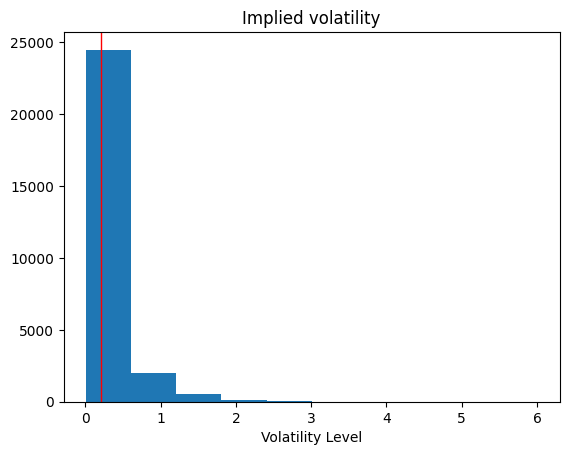

In [ ]:
# Input Variable Histograms

plt.hist(implied_volatility)
plt.xlabel("Volatility Level")
plt.title('Implied volatility')
plt.axvline(implied_volatility.mean(), linewidth=1, color = 'r')
plt.show()

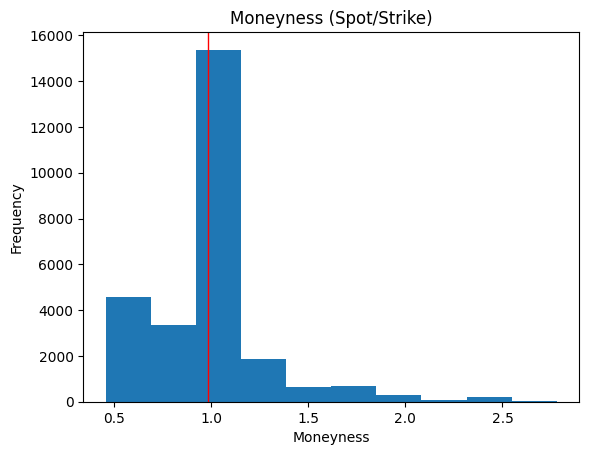

In [ ]:
plt.hist(moneyness)
plt.xlabel("Moneyness")
plt.ylabel("Frequency")
plt.title('Moneyness (Spot/Strike)')
plt.axvline(moneyness.mean(), linewidth=1, color = 'r')
plt.show()

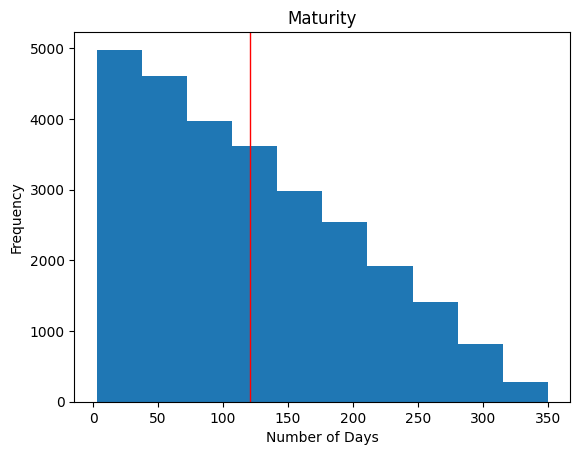

In [ ]:
plt.hist(maturity)
plt.xlabel("Number of Days")
plt.ylabel("Frequency")
plt.title('Maturity')
plt.axvline(maturity.mean(), linewidth=1, color = 'r')
plt.show()

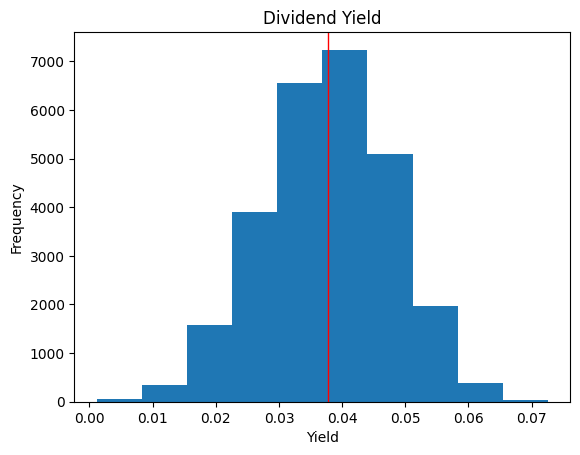

In [ ]:
plt.hist(dividend_yield)
plt.xlabel("Yield")
plt.ylabel("Frequency")
plt.title('Dividend Yield')
plt.axvline(dividend_yield.mean(), linewidth=1, color = 'r')
plt.show()

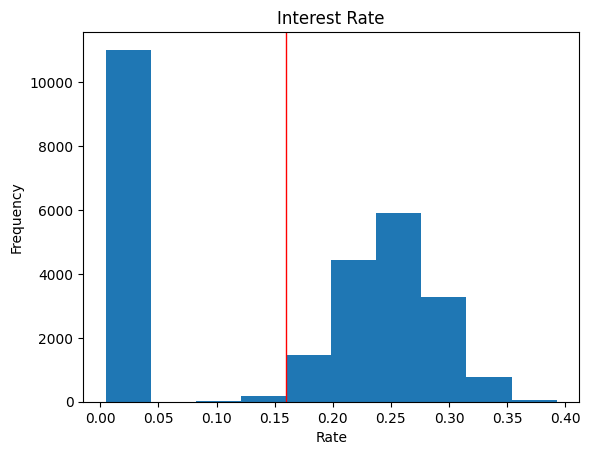

In [ ]:
plt.hist(Interest_Rates)
plt.xlabel("Rate")
plt.ylabel("Frequency")
plt.title('Interest Rate')
plt.axvline(Interest_Rates.mean(), linewidth=1, color = 'r')
plt.show()

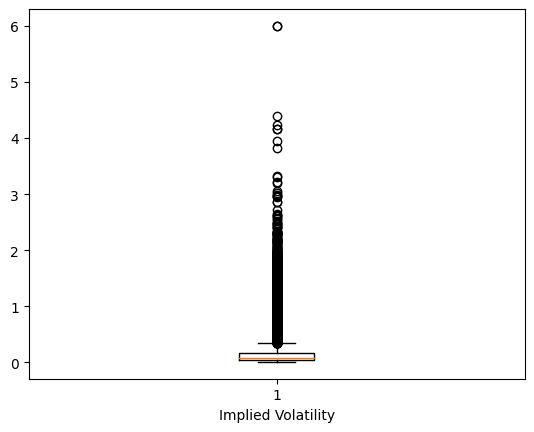

In [ ]:
#Input Variable BoxPlots
plt.boxplot(implied_volatility)
plt.xlabel("Implied Volatility")
plt.show()

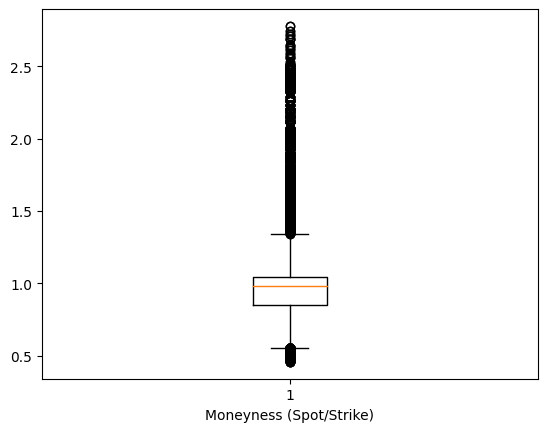

In [ ]:
plt.boxplot(moneyness)
plt.xlabel("Moneyness (Spot/Strike)")
plt.show()

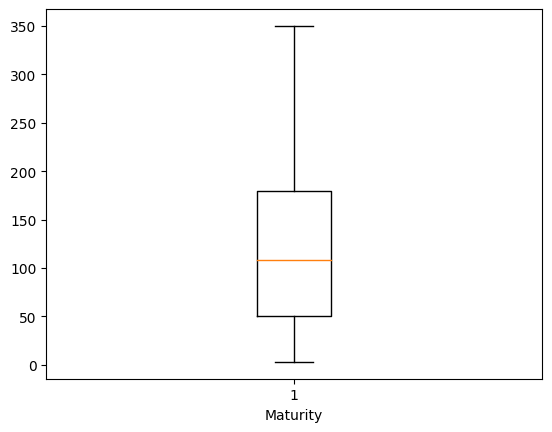

In [ ]:
plt.boxplot(maturity)
plt.xlabel("Maturity")
plt.show()

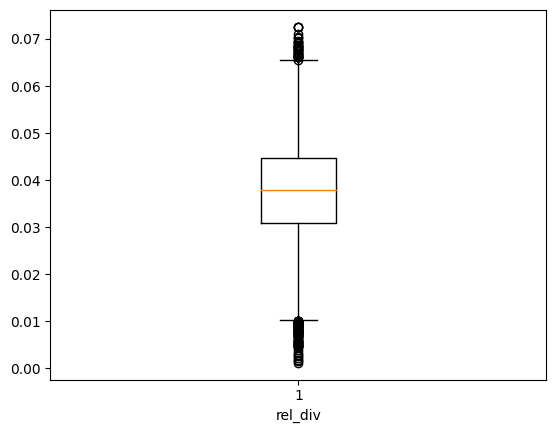

In [ ]:
plt.boxplot(dividend_yield)
plt.xlabel("rel_div")
plt.show()

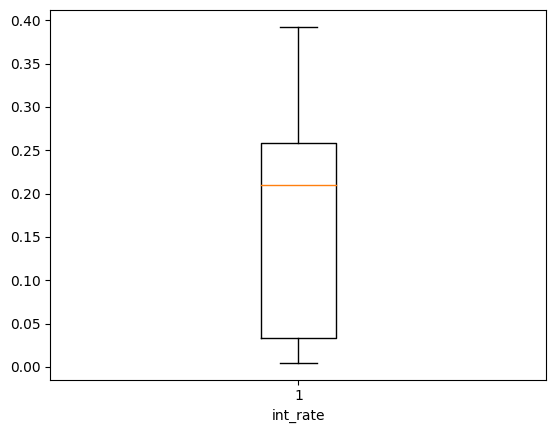

In [ ]:
plt.boxplot(Interest_Rates)
plt.xlabel("int_rate")
plt.show()

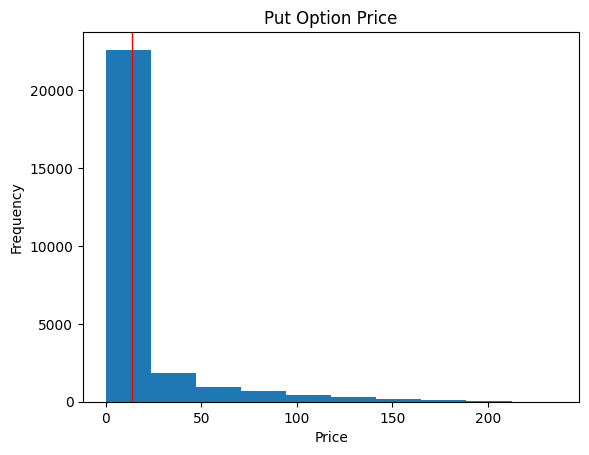

In [ ]:
# Put Price - output variable
plt.hist(y)
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title('Put Option Price')
plt.axvline(y.mean(), linewidth=1, color = 'r')
plt.show()


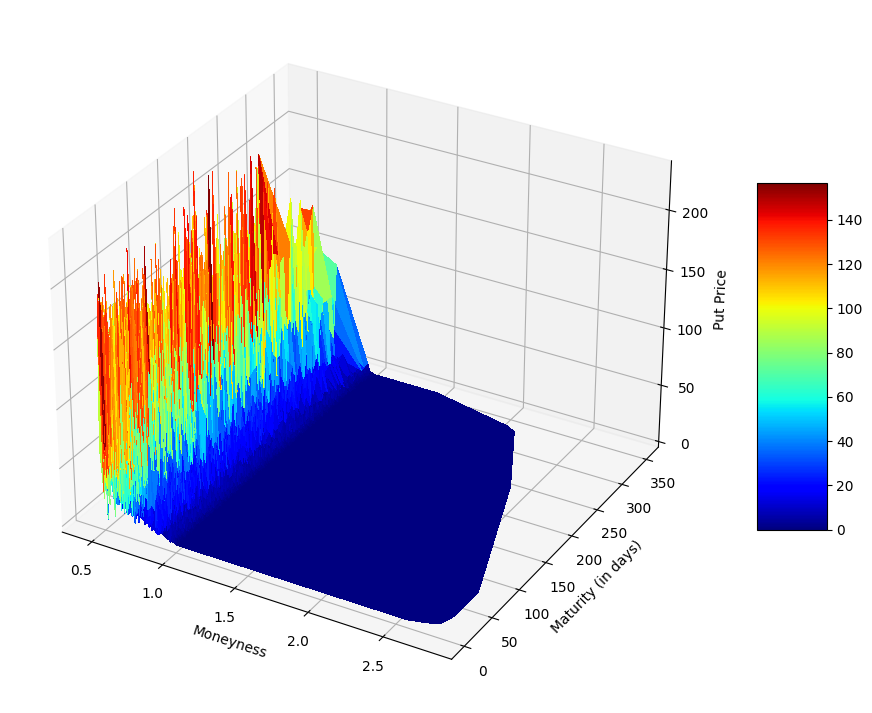

In [ ]:
# Creating figure

fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')
my_cmap = plt.get_cmap('plasma')
surf = ax.plot_trisurf(moneyness, maturity, y,cmap=cm.jet, linewidth=0, antialiased=False)
ax.set_xlabel('Moneyness')
ax.set_ylabel('Maturity (in days)')
ax.set_zlabel('Put Price')
fig.colorbar(surf, ax = ax,
             shrink = 0.5, aspect = 5)
plt.show()

In [ ]:
# describe stocks by BAC
BAC = solid_data[solid_data['Company_Brand'].str.contains("BAC")]
BAC.describe()

Unnamed: 0   Put_Prices  Stock_Prices  Implied_Volatility  \
count  3089.000000  3089.000000   3089.000000         3089.000000   
mean   1544.000000     3.444147     30.942093            0.418560   
std     891.861817     6.565921      2.230799            0.461120   
min       0.000000     0.000000     27.670265            0.013802   
25%     772.000000     0.000000     28.882140            0.018203   
50%    1544.000000     0.281621     31.062819            0.394051   
75%    2316.000000     2.696000     32.780220            0.658270   
max    3088.000000    41.208272     36.170843            3.048356   

       Strike_Prices  Dividend_Yield     Maturity    Moneyness  Interest_Rates  
count    3089.000000     3089.000000  3089.000000  3089.000000     3089.000000  
mean       32.725154        0.030038   129.912593     0.998480        0.250150  
std         7.978104        0.007867    81.211432     0.241137        0.040305  
min        20.000000        0.001180     5.000000     0.553405        0.115867  
25%        28.000000        0.024799    60.000000     0.922281        0.223268  
50%        31.000000        0.030018   120.000000     0.988645        0.249416  
75%        36.000000        0.035338   190.000000     1.068136        0.276883  
max        50.000000        0.061898   330.000000     1.808542        0.376795

In [ ]:
# describe stocks by GM
GM = solid_data[solid_data['Company_Brand'].str.contains("GM")]
GM.describe()

Unnamed: 0   Put_Prices  Stock_Prices  Implied_Volatility  \
count  5111.000000  5111.000000   5111.000000         5111.000000   
mean   2555.000000     4.038919     45.399145            0.242026   
std    1475.562943     7.912262      4.288045            0.318936   
min       0.000000     0.000000     37.833660            0.010003   
25%    1277.500000     0.000000     41.043706            0.011452   
50%    2555.000000     0.000000     46.822612            0.022909   
75%    3832.500000     2.751260     48.351750            0.370052   
max    5110.000000    51.479703     55.592694            2.307936   

       Strike_Prices  Dividend_Yield     Maturity    Moneyness  Interest_Rates  
count    5111.000000     5111.000000  5111.000000  5111.000000     5111.000000  
mean       45.140481        0.027992   119.799843     1.111349        0.035032  
std        12.877058        0.008068    82.318966     0.426969        0.001994  
min        20.000000        0.001592     3.000000     0.540481        0.027596  
25%        39.000000        0.022671    51.000000     0.943921        0.033716  
50%        46.000000        0.027993   105.000000     1.001712        0.035029  
75%        50.000000        0.033425   180.000000     1.076852        0.036381  
max        70.000000        0.057518   330.000000     2.779635        0.042490

In [ ]:
# describe stocks by BAC
PG = solid_data[solid_data['Company_Brand'].str.contains("PG")]
PG.describe()

Unnamed: 0    Put_Prices  Stock_Prices  Implied_Volatility  \
count  13055.000000  13055.000000  13055.000000        13055.000000   
mean    6527.000000     20.403943    130.855324            0.100631   
std     3768.798217     38.967360      7.366832            0.116402   
min        0.000000      0.000000    119.551293            0.053333   
25%     3263.500000      0.000000    126.619014            0.076841   
50%     6527.000000      2.018397    129.137342            0.087433   
75%     9790.500000     15.852181    131.487411            0.099934   
max    13054.000000    235.917863    152.790077            4.167674   

       Strike_Prices  Dividend_Yield      Maturity     Moneyness  \
count    13055.00000    13055.000000  13055.000000  13055.000000   
mean       147.77365        0.039995    120.585216      0.939439   
std         41.34198        0.007992     83.036436      0.205217   
min        100.00000        0.010346      5.000000      0.478205   
25%        125.00000        0.034673     50.000000      0.866198   
50%        132.50000        0.039919    105.000000      0.980609   
75%        150.00000        0.045414    180.000000      1.033625   
max        250.00000        0.072586    350.000000      1.527901   

       Interest_Rates  
count    13055.000000  
mean         0.249706  
std          0.039942  
min          0.082726  
25%          0.222800  
50%          0.250000  
75%          0.276890  
max          0.392522

In [ ]:
# describe stocks by KO
KO = solid_data[solid_data['Company_Brand'].str.contains("KO")]
KO.describe()

Unnamed: 0   Put_Prices  Stock_Prices  Implied_Volatility  \
count  5901.000000  5901.000000   5901.000000         5901.000000   
mean   2950.000000    12.814883     53.483206            0.299413   
std    1703.616301    19.098485      3.435941            0.457697   
min       0.000000     0.000000     48.002718            0.010004   
25%    1475.000000     0.000000     51.333513            0.010005   
50%    2950.000000     1.924224     52.650969            0.076742   
75%    4425.000000    22.004544     55.122172            0.414270   
max    5900.000000   116.415324     64.083071            5.999996   

       Strike_Prices  Dividend_Yield    Maturity    Moneyness  Interest_Rates  
count    5901.000000     5901.000000  5901.00000  5901.000000     5901.000000  
mean       62.810117        0.045045   116.10422     0.966166        0.020043  
std        22.151807        0.007952    80.75526     0.362289        0.003994  
min        30.000000        0.015804     3.00000     0.457169        0.004683  
25%        47.500000        0.039628    48.00000     0.686792        0.017387  
50%        55.000000        0.045065   102.00000     0.958646        0.020045  
75%        75.000000        0.050567   174.00000     1.065014        0.022711  
max       105.000000        0.072467   330.00000     2.136102        0.035724

In [ ]:
# stats of different companies
BAC_full_count = BAC.count()["Maturity"]
GM_full_count = GM.count()["Maturity"]
KO_full_count = KO.count()["Maturity"]
PG_full_count = PG.count()["Maturity"]



BAC_less_one_months_count = BAC[BAC["Maturity"]<30].count()["Maturity"]
GM_less_one_months_count = GM[GM["Maturity"]<30].count()["Maturity"]
KO_less_one_months_count = KO[KO["Maturity"]<30].count()["Maturity"]
PG_less_one_months_count = PG[PG["Maturity"]<30].count()["Maturity"]

BAC_one_to_six_months_count = len(BAC[(BAC["Maturity"]>=30) & (BAC["Maturity"]<=180)])
GM_one_to_six_months_count = len(GM[(GM["Maturity"]>=30) & (GM["Maturity"]<=180)])
KO_one_to_six_months_count = len(KO[(KO["Maturity"]>=30) & (KO["Maturity"]<=180)])
PG_one_to_six_months_count = len(PG[(PG["Maturity"]>=30) & (PG["Maturity"]<=180)])

BAC_more_six_months_count = BAC[180<BAC["Maturity"]].count()["Maturity"]
GM_more_six_months_count = GM[180<GM["Maturity"]].count()["Maturity"]
KO_more_six_months_count = KO[180<KO["Maturity"]].count()["Maturity"]
PG_more_six_months_count = PG[180<PG["Maturity"]].count()["Maturity"]

BAC_less_one_months_percentage = round(BAC_less_one_months_count/BAC_full_count,2)
BAC_one_to_six_months_percentage = round(BAC_one_to_six_months_count/BAC_full_count,2)
BAC_more_six_months_percentage = round(BAC_more_six_months_count/BAC_full_count,2)

GM_less_one_months_percentage = round(GM_less_one_months_count/GM_full_count,2)
GM_one_to_six_months_percentage = round(GM_one_to_six_months_count/GM_full_count,2)
GM_more_six_months_percentage = round(GM_more_six_months_count/GM_full_count,2)

KO_less_one_months_percentage = round(KO_less_one_months_count/KO_full_count,2)
KO_one_to_six_months_percentage = round(KO_one_to_six_months_count/KO_full_count,2)
KO_more_six_months_percentage =round(KO_more_six_months_count/KO_full_count,2)

PG_less_one_months_percentage = round(PG_less_one_months_count/PG_full_count,2)
PG_one_to_six_months_percentage = round(PG_one_to_six_months_count/PG_full_count,2)
PG_more_six_months_percentage = round(PG_more_six_months_count/PG_full_count,2)

total_full_counts = BAC_full_count + GM_full_count + KO_full_count + PG_full_count

total_less_one_month_count = BAC_less_one_months_count + GM_less_one_months_count + KO_less_one_months_count + PG_less_one_months_count
total_less_one_month_percentage = round(total_less_one_month_count / total_full_counts,2)

total_one_to_six_months_count = BAC_one_to_six_months_count + GM_one_to_six_months_count + KO_one_to_six_months_count + PG_one_to_six_months_count
total_one_to_six_months_percentage = round(total_one_to_six_months_count / total_full_counts,2)

total_more_six_months_count = BAC_more_six_months_count + GM_more_six_months_count + KO_more_six_months_count + PG_more_six_months_count
total_more_six_months_percentage = round(total_more_six_months_count / total_full_counts,2)


In [ ]:
from prettytable import PrettyTable

myTable = PrettyTable(["","<1 Month ", "1-6 Months", ">6 Months"])
print('Sample Maturity')
myTable.add_row(["BAC", BAC_less_one_months_percentage, BAC_one_to_six_months_percentage, BAC_more_six_months_percentage])
myTable.add_row(["GM", GM_less_one_months_percentage, GM_one_to_six_months_percentage, GM_more_six_months_percentage])
myTable.add_row(["KO", KO_less_one_months_percentage, KO_one_to_six_months_percentage, KO_more_six_months_percentage])
myTable.add_row(["PG", PG_less_one_months_percentage, PG_one_to_six_months_percentage, PG_more_six_months_percentage])
myTable.add_row(["Total", total_less_one_month_percentage, total_one_to_six_months_percentage, total_more_six_months_percentage])



print(myTable)


Sample Maturity
+-------+-----------+------------+-----------+
|       | <1 Month  | 1-6 Months | >6 Months |
+-------+-----------+------------+-----------+
|  BAC  |    0.11   |    0.62    |    0.27   |
|   GM  |    0.14   |    0.62    |    0.24   |
|   KO  |    0.15   |    0.62    |    0.23   |
|   PG  |    0.13   |    0.63    |    0.24   |
| Total |    0.13   |    0.62    |    0.24   |
+-------+-----------+------------+-----------+


In [ ]:
BAC_ITM_count = BAC[BAC["Moneyness"]>1.05].count()["Moneyness"]
BAC_ATM_count = len(BAC[(BAC["Moneyness"]>=0.95) & (BAC["Moneyness"]<=1.05)])
BAC_OTM_count = BAC[BAC["Moneyness"]<0.95].count()["Moneyness"]

GM_ITM_count = GM[GM["Moneyness"]>1.05].count()["Moneyness"]
GM_ATM_count = len(GM[(GM["Moneyness"]>=0.95) & (GM["Moneyness"]<=1.05)])
GM_OTM_count = GM[GM["Moneyness"]<0.95].count()["Moneyness"]

KO_ITM_count = KO[KO["Moneyness"]>1.05].count()["Moneyness"]
KO_ATM_count = len(KO[(KO["Moneyness"]>=0.95) & (KO["Moneyness"]<=1.05)])
KO_OTM_count = KO[KO["Moneyness"]<0.95].count()["Moneyness"]

PG_ITM_count = PG[PG["Moneyness"]>1.05].count()["Moneyness"]
PG_ATM_count = len(PG[(PG["Moneyness"]>=0.95) & (PG["Moneyness"]<=1.05)])
PG_OTM_count = PG[PG["Moneyness"]<0.95].count()["Moneyness"]

BAC_ITM_percentage = round(BAC_ITM_count/BAC_full_count,2)
BAC_ATM_percentage = round(BAC_ATM_count/BAC_full_count,2)
BAC_OTM_percentage = round(BAC_OTM_count/BAC_full_count,2)

GM_ITM_percentage = round(GM_ITM_count/GM_full_count,2)
GM_ATM_percentage = round(GM_ATM_count/GM_full_count,2)
GM_OTM_percentage = round(GM_OTM_count/GM_full_count,2)

KO_ITM_percentage = round(KO_ITM_count/KO_full_count,2)
KO_ATM_percentage = round(KO_ATM_count/KO_full_count,2)
KO_OTM_percentage = round(KO_OTM_count/KO_full_count,2)

PG_ITM_percentage = round(PG_ITM_count/PG_full_count,2)
PG_ATM_percentage = round(PG_ATM_count/PG_full_count,2)
PG_OTM_percentage = round(PG_OTM_count/PG_full_count,2)


total_ITM_count = BAC_ITM_count + GM_ITM_count + KO_ITM_count + PG_ITM_count
total_ATM_count = BAC_ATM_count + GM_ATM_count + KO_ATM_count + PG_ATM_count
total_OTM_count = BAC_OTM_count + GM_OTM_count + KO_OTM_count + PG_OTM_count

total_ITM_percentage = round(total_ITM_count/total_full_counts,2)
total_ATM_percentage = round(total_ATM_count/total_full_counts,2)
total_OTM_percentage = round(total_OTM_count/total_full_counts,2)

In [ ]:
myTable = PrettyTable(["","ITM", "ATM", "OTM"])
print('Sample Moneyness')
myTable.add_row(["BAC", BAC_ITM_percentage, BAC_ATM_percentage, BAC_OTM_percentage])
myTable.add_row(["GM", GM_ITM_percentage, GM_ATM_percentage, GM_OTM_percentage])
myTable.add_row(["KO", KO_ITM_percentage, KO_ATM_percentage, KO_OTM_percentage])
myTable.add_row(["PG", PG_ITM_percentage, PG_ATM_percentage, PG_OTM_percentage])
myTable.add_row(["Total", total_ITM_percentage, total_ATM_percentage, total_OTM_percentage])




print(myTable)

Sample Moneyness
+-------+------+------+------+
|       | ITM  | ATM  | OTM  |
+-------+------+------+------+
|  BAC  | 0.3  | 0.34 | 0.36 |
|   GM  | 0.32 | 0.4  | 0.28 |
|   KO  | 0.29 | 0.24 | 0.47 |
|   PG  | 0.18 | 0.49 | 0.33 |
| Total | 0.24 | 0.4  | 0.35 |
+-------+------+------+------+


In [ ]:
# NN 1 && 2 ON BAC

X_BAC=BAC[['Stock_Prices', 'Implied_Volatility', 'Strike_Prices', 'Dividend_Yield', 'Maturity', 'Moneyness','Interest_Rates']]
y_BAC=BAC['Put_Prices']

X_train_BAC, X_test_BAC, y_train_BAC, y_test_BAC = train_test_split(X_BAC, y_BAC, test_size = 0.2, shuffle=True)
X_train_BAC, X_val_BAC, y_train_BAC, y_val_BAC = train_test_split(X_train_BAC,y_train_BAC, test_size = 0.2, shuffle=True)

model_n1_BAC = ann1.fit(X_train_BAC, y_train_BAC, batch_size = 32, epochs = 200,validation_data=(X_val_BAC, y_val_BAC),
              shuffle=True,verbose = 0)



In [ ]:
model_n2_BAC = ann2.fit(X_train_BAC, y_train_BAC, batch_size = 64, epochs = 300,validation_data=(X_val_BAC, y_val_BAC),
              shuffle=True,verbose = 0)

In [ ]:
X_GM=GM[['Stock_Prices', 'Implied_Volatility', 'Strike_Prices', 'Dividend_Yield', 'Maturity', 'Moneyness','Interest_Rates' ]]
y_GM=GM['Put_Prices']

X_train_GM, X_test_GM, y_train_GM, y_test_GM = train_test_split(X_GM, y_GM, test_size = 0.2, shuffle=True)
X_train_GM, X_val_GM, y_train_GM, y_val_GM = train_test_split(X_train_GM,y_train_GM, test_size = 0.2, shuffle=True)

model_n1_GM = ann1.fit(X_train_GM, y_train_GM, batch_size = 32, epochs = 200,validation_data=(X_val_GM, y_val_GM),
              shuffle=True,verbose =0)

In [ ]:
model_n2_GM = ann2.fit(X_train_GM, y_train_GM, batch_size = 64, epochs = 300,validation_data=(X_val_GM, y_val_GM),
              shuffle=True,verbose = 0)

In [ ]:
X_KO=KO[['Stock_Prices', 'Implied_Volatility', 'Strike_Prices', 'Dividend_Yield', 'Maturity', 'Moneyness',"Interest_Rates" ]]
y_KO=KO['Put_Prices']

X_train_KO, X_test_KO, y_train_KO, y_test_KO = train_test_split(X_KO, y_KO, test_size = 0.2, shuffle=True)
X_train_KO, X_val_KO, y_train_KO, y_val_KO = train_test_split(X_train_KO,y_train_KO, test_size = 0.2, shuffle=True)

model_n1_KO = ann1.fit(X_train_KO, y_train_KO, batch_size = 32, epochs = 200,validation_data=(X_val_KO, y_val_KO),
              shuffle=True,verbose = 0)

In [ ]:
model_n2_KO = ann2.fit(X_train_KO, y_train_KO, batch_size = 64, epochs = 300,validation_data=(X_val_KO, y_val_KO),
              shuffle=True,verbose = 0)

In [ ]:
X_PG=PG[['Stock_Prices', 'Implied_Volatility', 'Strike_Prices', 'Dividend_Yield', 'Maturity', 'Moneyness','Interest_Rates']]
y_PG=PG['Put_Prices']

X_train_PG, X_test_PG, y_train_PG, y_test_PG = train_test_split(X_PG, y_PG, test_size = 0.2, shuffle=True)
X_train_PG, X_val_PG, y_train_PG, y_val_PG = train_test_split(X_train_PG,y_train_PG, test_size = 0.2, shuffle=True)

model_n1_PG = ann1.fit(X_train_PG, y_train_PG, batch_size = 32, epochs = 200,validation_data=(X_val_PG, y_val_PG),
              shuffle=True,verbose = 0)

In [ ]:
model_n2_PG = ann2.fit(X_train_PG, y_train_PG, batch_size = 64, epochs = 300,validation_data=(X_val_PG, y_val_PG),
              shuffle=True, verbose = 0)

In [ ]:
stock_prices_BAC = X_BAC['Stock_Prices']
implied_volatility_BAC = X_BAC['Implied_Volatility']
strike_prices_BAC = X_BAC['Strike_Prices']
dividend_yield_BAC = X_BAC['Dividend_Yield']
maturity_BAC = X_BAC['Maturity']
moneyness_BAC = X_BAC['Moneyness']
Interest_Rates_BAC = X_BAC['Interest_Rates']

In [ ]:
y_pred_BAC = []
for i in range (len(X_BAC)):
      AmericanPUT = AmericanOptionsLSMC('put', stock_prices_BAC.iloc[i], float(strike_prices_BAC.iloc[i]), time, period, Interest_Rates_BAC.iloc[i], dividend_yield_BAC.iloc[i], implied_volatility_BAC.iloc[i], simulations )
      y_pred_BAC.append(AmericanPUT.price)


mse_BAC = mean_squared_error(y_BAC, y_pred_BAC)/10


<ipython-input-23-60a1da6dec2d>:73: RankWarning: Polyfit may be poorly conditioned
  def price(self): return np.sum(self.value_vector) / float(self.simulations)
<ipython-input-23-60a1da6dec2d>:73: RankWarning: Polyfit may be poorly conditioned
  def price(self): return np.sum(self.value_vector) / float(self.simulations)
<ipython-input-23-60a1da6dec2d>:73: RankWarning: Polyfit may be poorly conditioned
  def price(self): return np.sum(self.value_vector) / float(self.simulations)
<ipython-input-23-60a1da6dec2d>:73: RankWarning: Polyfit may be poorly conditioned
  def price(self): return np.sum(self.value_vector) / float(self.simulations)
<ipython-input-23-60a1da6dec2d>:73: RankWarning: Polyfit may be poorly conditioned
  def price(self): return np.sum(self.value_vector) / float(self.simulations)
<ipython-input-23-60a1da6dec2d>:73: RankWarning: Polyfit may be poorly conditioned
  def price(self): return np.sum(self.value_vector) / float(self.simulations)
<ipython-input-23-60a1da6dec2d>:73

In [ ]:
stock_prices_GM = X_GM['Stock_Prices']
implied_volatility_GM = X_GM['Implied_Volatility']
strike_prices_GM = X_GM['Strike_Prices']
dividend_yield_GM = X_GM['Dividend_Yield']
maturity_GM = X_GM['Maturity']
moneyness_GM = X_GM['Moneyness']
Interest_Rates_GM = X_GM['Interest_Rates']

In [ ]:
y_pred_GM = []
for i in range (len(X_GM)):
      AmericanPUT = AmericanOptionsLSMC('put', stock_prices_GM.iloc[i], float(strike_prices_GM.iloc[i]), time, period, Interest_Rates_GM.iloc[i], dividend_yield_GM.iloc[i], implied_volatility_GM.iloc[i], simulations )
      y_pred_GM.append(AmericanPUT.price)

mse_GM = mean_squared_error(y_GM, y_pred_GM)


Streaming output truncated to the last 5000 lines.
<ipython-input-23-60a1da6dec2d>:73: RankWarning: Polyfit may be poorly conditioned
  def price(self): return np.sum(self.value_vector) / float(self.simulations)
<ipython-input-23-60a1da6dec2d>:73: RankWarning: Polyfit may be poorly conditioned
  def price(self): return np.sum(self.value_vector) / float(self.simulations)
<ipython-input-23-60a1da6dec2d>:73: RankWarning: Polyfit may be poorly conditioned
  def price(self): return np.sum(self.value_vector) / float(self.simulations)
<ipython-input-23-60a1da6dec2d>:73: RankWarning: Polyfit may be poorly conditioned
  def price(self): return np.sum(self.value_vector) / float(self.simulations)
<ipython-input-23-60a1da6dec2d>:73: RankWarning: Polyfit may be poorly conditioned
  def price(self): return np.sum(self.value_vector) / float(self.simulations)
<ipython-input-23-60a1da6dec2d>:73: RankWarning: Polyfit may be poorly conditioned
  def price(self): return np.sum(self.value_vector) / float(s

In [ ]:
stock_prices_KO = X_KO['Stock_Prices']
implied_volatility_KO = X_KO['Implied_Volatility']
strike_prices_KO = X_KO['Strike_Prices']
dividend_yield_KO = X_KO['Dividend_Yield']
maturity_KO = X_KO['Maturity']
moneyness_KO = X_KO['Moneyness']
Interest_Rates_KO = X_KO['Interest_Rates']

In [ ]:
y_pred_KO = []
for i in range (len(X_KO)):
      AmericanPUT = AmericanOptionsLSMC('put', stock_prices_KO.iloc[i], float(strike_prices_KO.iloc[i]), time, period, Interest_Rates_KO.iloc[i], dividend_yield_KO.iloc[i], implied_volatility_KO.iloc[i], simulations )
      y_pred_KO.append(AmericanPUT.price)


mse_KO = mean_squared_error(y_KO, y_pred_KO)


Streaming output truncated to the last 5000 lines.
<ipython-input-23-60a1da6dec2d>:73: RankWarning: Polyfit may be poorly conditioned
  def price(self): return np.sum(self.value_vector) / float(self.simulations)
<ipython-input-23-60a1da6dec2d>:73: RankWarning: Polyfit may be poorly conditioned
  def price(self): return np.sum(self.value_vector) / float(self.simulations)
<ipython-input-23-60a1da6dec2d>:73: RankWarning: Polyfit may be poorly conditioned
  def price(self): return np.sum(self.value_vector) / float(self.simulations)
<ipython-input-23-60a1da6dec2d>:73: RankWarning: Polyfit may be poorly conditioned
  def price(self): return np.sum(self.value_vector) / float(self.simulations)
<ipython-input-23-60a1da6dec2d>:73: RankWarning: Polyfit may be poorly conditioned
  def price(self): return np.sum(self.value_vector) / float(self.simulations)
<ipython-input-23-60a1da6dec2d>:73: RankWarning: Polyfit may be poorly conditioned
  def price(self): return np.sum(self.value_vector) / float(s

In [ ]:
stock_prices_PG = X_PG['Stock_Prices']
implied_volatility_PG = X_PG['Implied_Volatility']
strike_prices_PG = X_PG['Strike_Prices']
dividend_yield_PG = X_PG['Dividend_Yield']
maturity_PG = X_PG['Maturity']
moneyness_PG = X_PG['Moneyness']
Interest_Rates_PG = X_PG['Interest_Rates']

In [ ]:
y_pred_PG = []
for i in range (len(X_PG)):
      AmericanPUT = AmericanOptionsLSMC('put', stock_prices_PG.iloc[i], float(strike_prices_PG.iloc[i]), time, period, Interest_Rates_PG.iloc[i], dividend_yield_PG.iloc[i], implied_volatility_PG.iloc[i], simulations )
      y_pred_PG.append(AmericanPUT.price)


mse_PG = mean_squared_error(y_PG, y_pred_PG)


In [ ]:
import math
#RMSE RESULTS
myTable = PrettyTable(["","NN model 1", "NN model 2", "LSM"])
print('RMSE per model')
rmse_BAC_nn1 = round( math.sqrt(mean(model_n1_BAC.history['loss'][-10:])),2)
rmse_BAC_nn2 = round( math.sqrt(mean(model_n2_BAC.history['loss'][-10:])),2)
rmse_BAC_lsm = round(math.sqrt(mse_BAC),2)
myTable.add_row(["BAC",rmse_BAC_nn1, rmse_BAC_nn2,rmse_BAC_lsm ])

rmse_GM_nn1 = round( math.sqrt(mean(model_n1_GM.history['loss'][-10:])),2)
rmse_GM_nn2 = round( math.sqrt(mean(model_n2_GM.history['loss'][-10:])),2)
rmse_GM_lsm = round(math.sqrt(mse_GM),2)
myTable.add_row(["GM",rmse_GM_nn1, rmse_GM_nn2,rmse_GM_lsm ])

rmse_KO_nn1 = round( math.sqrt(mean(model_n1_KO.history['loss'][-10:])),2)
rmse_KO_nn2 = round( math.sqrt(mean(model_n2_KO.history['loss'][-10:])),2)
rmse_KO_lsm = round(math.sqrt(mse_KO),2)
myTable.add_row(["KO",rmse_KO_nn1, rmse_KO_nn2,rmse_KO_lsm ])

rmse_PG_nn1 = round( math.sqrt(mean(model_n1_PG.history['loss'][-10:])),2)
rmse_PG_nn2 = round( math.sqrt(mean(model_n2_PG.history['loss'][-10:])),2)
rmse_PG_lsm = round(math.sqrt(mse_PG),2)
myTable.add_row(["PG",rmse_PG_nn1, rmse_PG_nn2,rmse_PG_lsm ])

rmse_nn1 = round( math.sqrt(mean(model_n1.history['loss'][-10:])),2)
rmse_nn2 = round( math.sqrt(mean(model_n2.history['loss'][-10:])),2)
rmse_lsm = round(math.sqrt(mse),2)
myTable.add_row(["Total",rmse_nn1, rmse_nn2,rmse_lsm ])





print(myTable)

RMSE per model
+-------+------------+------------+-------+
|       | NN model 1 | NN model 2 |  LSM  |
+-------+------------+------------+-------+
|  BAC  |    0.31    |    0.15    |  0.2  |
|   GM  |    0.28    |    0.15    |  0.47 |
|   KO  |    1.99    |    1.92    |  2.9  |
|   PG  |   13.25    |   13.11    | 13.03 |
| Total |    9.36    |    9.02    | 11.34 |
+-------+------------+------------+-------+


In [ ]:
X_BAC_less_one_month = X_BAC.loc[(X_BAC['Maturity'] <30)]
y_BAC_less_one_month = y_BAC.loc[(X_BAC['Maturity'] <30)]

X_train_BAC_less_than_one_month, X_test_BAC_less_than_one_month, y_train_BAC_less_than_one_month, y_test_BAC_less_than_one_month = train_test_split(X_BAC_less_one_month, y_BAC_less_one_month, test_size = 0.2, shuffle=True)
X_train_BAC_less_than_one_month, X_val_BAC_less_than_one_month, y_train_BAC_less_than_one_month, y_val_BAC_less_than_one_month = train_test_split(X_train_BAC_less_than_one_month,y_train_BAC_less_than_one_month, test_size = 0.2, shuffle=True)

model_n1_BAC_less_than_one_month = ann1.fit(X_train_BAC_less_than_one_month, y_train_BAC_less_than_one_month, batch_size = 32, epochs = 200,validation_data=(X_val_BAC_less_than_one_month, y_val_BAC_less_than_one_month),
              shuffle=True,verbose = 0)
model_n2_BAC_less_than_one_month = ann2.fit(X_train_BAC_less_than_one_month, y_train_BAC_less_than_one_month, batch_size = 32, epochs = 200,validation_data=(X_val_BAC_less_than_one_month, y_val_BAC_less_than_one_month),
              shuffle=True,verbose = 0)

In [ ]:
X_BAC_one_month_to_six = X_BAC.loc[(X_BAC['Maturity'] >=30) & (X_BAC['Maturity'] <180)]
y_BAC_one_month_to_six = y_BAC.loc[(X_BAC['Maturity'] >=30) & (X_BAC['Maturity'] <180)]

X_train_BAC_one_month_to_six, X_test_BAC_one_month_to_six, y_train_BAC_one_month_to_six, y_test_BAC_one_month_to_six = train_test_split(X_BAC_less_one_month, y_BAC_less_one_month, test_size = 0.2, shuffle=True)
X_train_BAC_one_month_to_six, X_val_BAC_one_month_to_six, y_train_BAC_one_month_to_six, y_val_BAC_one_month_to_six = train_test_split(X_train_BAC_one_month_to_six,y_train_BAC_one_month_to_six, test_size = 0.2, shuffle=True)

model_n1_BAC_one_month_to_six = ann1.fit(X_train_BAC_one_month_to_six, y_train_BAC_one_month_to_six, batch_size = 32, epochs = 200,validation_data=(X_val_BAC_one_month_to_six, y_val_BAC_one_month_to_six),
              shuffle=True,verbose = 0)
model_n2_BAC_one_month_to_six = ann2.fit(X_train_BAC_one_month_to_six, y_train_BAC_one_month_to_six, batch_size = 32, epochs = 200,validation_data=(X_val_BAC_one_month_to_six, y_val_BAC_one_month_to_six),
              shuffle=True,verbose = 0)

In [ ]:
X_BAC_more_than_six = X_BAC.loc[(X_BAC['Maturity'] >=180)]
y_BAC_more_than_six = y_BAC.loc[(X_BAC['Maturity'] >=180)]

X_train_BAC_more_than_six, X_test_BAC_more_than_six, y_train_BAC_more_than_six, y_test_BAC_more_than_six = train_test_split(X_BAC_less_one_month, y_BAC_less_one_month, test_size = 0.2, shuffle=True)
X_train_BAC_more_than_six, X_val_BAC_more_than_six, y_train_BAC_more_than_six, y_val_BAC_more_than_six = train_test_split(X_train_BAC_more_than_six,y_train_BAC_more_than_six, test_size = 0.2, shuffle=True)

model_n1_BAC_more_than_six = ann1.fit(X_train_BAC_more_than_six, y_train_BAC_more_than_six, batch_size = 32, epochs = 200,validation_data=(X_val_BAC_more_than_six, y_val_BAC_more_than_six),
              shuffle=True,verbose = 0)
model_n2_BAC_more_than_six = ann2.fit(X_train_BAC_more_than_six, y_train_BAC_more_than_six, batch_size = 32, epochs = 200,validation_data=(X_val_BAC_more_than_six, y_val_BAC_more_than_six),
              shuffle=True,verbose = 0)

In [ ]:
X_GM_less_one_month = X_GM.loc[(X_GM['Maturity'] <30)]
y_GM_less_one_month = y_GM.loc[(X_GM['Maturity'] <30)]

X_train_GM_less_than_one_month, X_test_GM_less_than_one_month, y_train_GM_less_than_one_month, y_test_GM_less_than_one_month = train_test_split(X_GM_less_one_month, y_GM_less_one_month, test_size = 0.2, shuffle=True)
X_train_GM_less_than_one_month, X_val_GM_less_than_one_month, y_train_GM_less_than_one_month, y_val_GM_less_than_one_month = train_test_split(X_train_GM_less_than_one_month,y_train_GM_less_than_one_month, test_size = 0.2, shuffle=True)

model_n1_GM_less_than_one_month = ann1.fit(X_train_GM_less_than_one_month, y_train_GM_less_than_one_month, batch_size = 32, epochs = 200,validation_data=(X_val_GM_less_than_one_month, y_val_GM_less_than_one_month),
              shuffle=True,verbose = 0)
model_n2_GM_less_than_one_month = ann2.fit(X_train_GM_less_than_one_month, y_train_GM_less_than_one_month, batch_size = 32, epochs = 200,validation_data=(X_val_GM_less_than_one_month, y_val_GM_less_than_one_month),
              shuffle=True,verbose = 0)

In [ ]:
X_GM_one_month_to_six = X_GM.loc[(X_GM['Maturity'] >=30) & (X_GM['Maturity'] <180)]
y_GM_one_month_to_six = y_GM.loc[(X_GM['Maturity'] >=30) & (X_GM['Maturity'] <180)]

X_train_GM_one_month_to_six, X_test_GM_one_month_to_six, y_train_GM_one_month_to_six, y_test_GM_one_month_to_six = train_test_split(X_GM_less_one_month, y_GM_less_one_month, test_size = 0.2, shuffle=True)
X_train_GM_one_month_to_six, X_val_GM_one_month_to_six, y_train_GM_one_month_to_six, y_val_GM_one_month_to_six = train_test_split(X_train_GM_one_month_to_six,y_train_GM_one_month_to_six, test_size = 0.2, shuffle=True)

model_n1_GM_one_month_to_six = ann1.fit(X_train_GM_one_month_to_six, y_train_GM_one_month_to_six, batch_size = 32, epochs = 200,validation_data=(X_val_GM_one_month_to_six, y_val_GM_one_month_to_six),
              shuffle=True,verbose = 0)
model_n2_GM_one_month_to_six = ann2.fit(X_train_GM_one_month_to_six, y_train_GM_one_month_to_six, batch_size = 32, epochs = 200,validation_data=(X_val_GM_one_month_to_six, y_val_GM_one_month_to_six),
              shuffle=True,verbose = 0)

In [ ]:
X_GM_more_than_six = X_GM.loc[(X_GM['Maturity'] >=180)]
y_GM_more_than_six = y_GM.loc[(X_GM['Maturity'] >=180)]

X_train_GM_more_than_six, X_test_GM_more_than_six, y_train_GM_more_than_six, y_test_GM_more_than_six = train_test_split(X_GM_less_one_month, y_GM_less_one_month, test_size = 0.2, shuffle=True)
X_train_GM_more_than_six, X_val_GM_more_than_six, y_train_GM_more_than_six, y_val_GM_more_than_six = train_test_split(X_train_GM_more_than_six,y_train_GM_more_than_six, test_size = 0.2, shuffle=True)

model_n1_GM_more_than_six = ann1.fit(X_train_GM_more_than_six, y_train_GM_more_than_six, batch_size = 32, epochs = 200,validation_data=(X_val_GM_more_than_six, y_val_GM_more_than_six),
              shuffle=True,verbose = 0)
model_n2_GM_more_than_six = ann2.fit(X_train_GM_more_than_six, y_train_GM_more_than_six, batch_size = 32, epochs = 200,validation_data=(X_val_GM_more_than_six, y_val_GM_more_than_six),
              shuffle=True,verbose = 0)

In [ ]:
X_KO_less_one_month = X_KO.loc[(X_KO['Maturity'] <30)]
y_KO_less_one_month = y_KO.loc[(X_KO['Maturity'] <30)]

X_train_KO_less_than_one_month, X_test_KO_less_than_one_month, y_train_KO_less_than_one_month, y_test_KO_less_than_one_month = train_test_split(X_KO_less_one_month, y_KO_less_one_month, test_size = 0.2, shuffle=True)
X_train_KO_less_than_one_month, X_val_KO_less_than_one_month, y_train_KO_less_than_one_month, y_val_KO_less_than_one_month = train_test_split(X_train_KO_less_than_one_month,y_train_KO_less_than_one_month, test_size = 0.2, shuffle=True)

model_n1_KO_less_than_one_month = ann1.fit(X_train_KO_less_than_one_month, y_train_KO_less_than_one_month, batch_size = 32, epochs = 200,validation_data=(X_val_KO_less_than_one_month, y_val_KO_less_than_one_month),
              shuffle=True,verbose = 0)
model_n2_KO_less_than_one_month = ann2.fit(X_train_KO_less_than_one_month, y_train_KO_less_than_one_month, batch_size = 32, epochs = 200,validation_data=(X_val_KO_less_than_one_month, y_val_KO_less_than_one_month),
              shuffle=True,verbose = 0)

In [ ]:
X_KO_one_month_to_six = X_KO.loc[(X_KO['Maturity'] >=30) & (X_KO['Maturity'] <180)]
y_KO_one_month_to_six = y_KO.loc[(X_KO['Maturity'] >=30) & (X_KO['Maturity'] <180)]

X_train_KO_one_month_to_six, X_test_KO_one_month_to_six, y_train_KO_one_month_to_six, y_test_KO_one_month_to_six = train_test_split(X_KO_less_one_month, y_KO_less_one_month, test_size = 0.2, shuffle=True)
X_train_KO_one_month_to_six, X_val_KO_one_month_to_six, y_train_KO_one_month_to_six, y_val_KO_one_month_to_six = train_test_split(X_train_KO_one_month_to_six,y_train_KO_one_month_to_six, test_size = 0.2, shuffle=True)

model_n1_KO_one_month_to_six = ann1.fit(X_train_KO_one_month_to_six, y_train_KO_one_month_to_six, batch_size = 32, epochs = 200,validation_data=(X_val_KO_one_month_to_six, y_val_KO_one_month_to_six),
              shuffle=True,verbose = 0)
model_n2_KO_one_month_to_six = ann2.fit(X_train_KO_one_month_to_six, y_train_KO_one_month_to_six, batch_size = 32, epochs = 200,validation_data=(X_val_KO_one_month_to_six, y_val_KO_one_month_to_six),
              shuffle=True,verbose = 0)

In [ ]:
X_KO_more_than_six = X_KO.loc[(X_KO['Maturity'] >=180)]
y_KO_more_than_six = y_KO.loc[(X_KO['Maturity'] >=180)]

X_train_KO_more_than_six, X_test_KO_more_than_six, y_train_KO_more_than_six, y_test_KO_more_than_six = train_test_split(X_KO_less_one_month, y_KO_less_one_month, test_size = 0.2, shuffle=True)
X_train_KO_more_than_six, X_val_KO_more_than_six, y_train_KO_more_than_six, y_val_KO_more_than_six = train_test_split(X_train_KO_more_than_six,y_train_KO_more_than_six, test_size = 0.2, shuffle=True)

model_n1_KO_more_than_six = ann1.fit(X_train_KO_more_than_six, y_train_KO_more_than_six, batch_size = 32, epochs = 200,validation_data=(X_val_KO_more_than_six, y_val_KO_more_than_six),
              shuffle=True,verbose = 0)
model_n2_KO_more_than_six = ann2.fit(X_train_KO_more_than_six, y_train_KO_more_than_six, batch_size = 32, epochs = 200,validation_data=(X_val_KO_more_than_six, y_val_KO_more_than_six),
              shuffle=True,verbose = 0)

In [ ]:
X_PG_less_one_month = X_PG.loc[(X_PG['Maturity'] <30)]
y_PG_less_one_month = y_PG.loc[(X_PG['Maturity'] <30)]

X_train_PG_less_than_one_month, X_test_PG_less_than_one_month, y_train_PG_less_than_one_month, y_test_PG_less_than_one_month = train_test_split(X_PG_less_one_month, y_PG_less_one_month, test_size = 0.2, shuffle=True)
X_train_PG_less_than_one_month, X_val_PG_less_than_one_month, y_train_PG_less_than_one_month, y_val_PG_less_than_one_month = train_test_split(X_train_PG_less_than_one_month,y_train_PG_less_than_one_month, test_size = 0.2, shuffle=True)

model_n1_PG_less_than_one_month = ann1.fit(X_train_PG_less_than_one_month, y_train_PG_less_than_one_month, batch_size = 32, epochs = 200,validation_data=(X_val_PG_less_than_one_month, y_val_PG_less_than_one_month),
              shuffle=True,verbose = 0)
model_n2_PG_less_than_one_month = ann2.fit(X_train_PG_less_than_one_month, y_train_PG_less_than_one_month, batch_size = 32, epochs = 200,validation_data=(X_val_PG_less_than_one_month, y_val_PG_less_than_one_month),
              shuffle=True,verbose = 0)

In [ ]:
X_PG_one_month_to_six = X_PG.loc[(X_PG['Maturity'] >=30) & (X_PG['Maturity'] <180)]
y_PG_one_month_to_six = y_PG.loc[(X_PG['Maturity'] >=30) & (X_PG['Maturity'] <180)]

X_train_PG_one_month_to_six, X_test_PG_one_month_to_six, y_train_PG_one_month_to_six, y_test_PG_one_month_to_six = train_test_split(X_PG_less_one_month, y_PG_less_one_month, test_size = 0.2, shuffle=True)
X_train_PG_one_month_to_six, X_val_PG_one_month_to_six, y_train_PG_one_month_to_six, y_val_PG_one_month_to_six = train_test_split(X_train_PG_one_month_to_six,y_train_PG_one_month_to_six, test_size = 0.2, shuffle=True)

model_n1_PG_one_month_to_six = ann1.fit(X_train_PG_one_month_to_six, y_train_PG_one_month_to_six, batch_size = 32, epochs = 200,validation_data=(X_val_PG_one_month_to_six, y_val_PG_one_month_to_six),
              shuffle=True,verbose = 0)
model_n2_PG_one_month_to_six = ann2.fit(X_train_PG_one_month_to_six, y_train_PG_one_month_to_six, batch_size = 32, epochs = 200,validation_data=(X_val_PG_one_month_to_six, y_val_PG_one_month_to_six),
              shuffle=True,verbose = 0)

In [ ]:
X_PG_more_than_six = X_PG.loc[(X_PG['Maturity'] >=180)]
y_PG_more_than_six = y_PG.loc[(X_PG['Maturity'] >=180)]

X_train_PG_more_than_six, X_test_PG_more_than_six, y_train_PG_more_than_six, y_test_PG_more_than_six = train_test_split(X_PG_less_one_month, y_PG_less_one_month, test_size = 0.2, shuffle=True)
X_train_PG_more_than_six, X_val_PG_more_than_six, y_train_PG_more_than_six, y_val_PG_more_than_six = train_test_split(X_train_PG_more_than_six,y_train_PG_more_than_six, test_size = 0.2, shuffle=True)

model_n1_PG_more_than_six = ann1.fit(X_train_PG_more_than_six, y_train_PG_more_than_six, batch_size = 32, epochs = 200,validation_data=(X_val_PG_more_than_six, y_val_PG_more_than_six),
              shuffle=True, verbose = 0)
model_n2_PG_more_than_six = ann2.fit(X_train_PG_more_than_six, y_train_PG_more_than_six, batch_size = 32, epochs = 200,validation_data=(X_val_PG_more_than_six, y_val_PG_more_than_six),
              shuffle=True, verbose = 0)

In [ ]:
stock_prices_BAC_less_one_month = X_BAC_less_one_month['Stock_Prices']
implied_volatility_BAC_less_one_month = X_BAC_less_one_month['Implied_Volatility']
strike_prices_BAC_less_one_month = X_BAC_less_one_month['Strike_Prices']
dividend_yield_BAC_less_one_month = X_BAC_less_one_month['Dividend_Yield']
maturity_BAC_less_one_month = X_BAC_less_one_month['Maturity']
moneyness_BAC_less_one_month = X_BAC_less_one_month['Moneyness']
Interest_Rates_BAC_less_one_month = X_BAC_less_one_month['Interest_Rates']


stock_prices_BAC_one_month_to_six = X_BAC_one_month_to_six['Stock_Prices']
implied_volatility_BAC_one_month_to_six = X_BAC_one_month_to_six['Implied_Volatility']
strike_prices_BAC_one_month_to_six = X_BAC_one_month_to_six['Strike_Prices']
dividend_yield_BAC_one_month_to_six = X_BAC_one_month_to_six['Dividend_Yield']
maturity_BAC_one_month_to_six = X_BAC_one_month_to_six['Maturity']
moneyness_BAC_one_month_to_six = X_BAC_one_month_to_six['Moneyness']
Interest_Rates_BAC_one_month_to_six = X_BAC_one_month_to_six['Interest_Rates']


stock_prices_BAC_more_than_six = X_BAC_more_than_six['Stock_Prices']
implied_volatility_BAC_more_than_six = X_BAC_more_than_six['Implied_Volatility']
strike_prices_BAC_more_than_six = X_BAC_more_than_six['Strike_Prices']
dividend_yield_BAC_more_than_six = X_BAC_more_than_six['Dividend_Yield']
maturity_BAC_more_than_six = X_BAC_more_than_six['Maturity']
moneyness_BAC_more_than_six = X_BAC_more_than_six['Moneyness']
Interest_Rates_BAC_more_than_six = X_BAC_more_than_six['Interest_Rates']


In [ ]:
#LSM for each company
y_pred_BAC_less_one_month = []
for i in range (len(X_BAC_less_one_month)):
      AmericanPUT = AmericanOptionsLSMC('put', stock_prices_BAC_less_one_month.iloc[i], float(strike_prices_BAC_less_one_month.iloc[i]), time, period, Interest_Rates_BAC_less_one_month.iloc[i], dividend_yield_BAC_less_one_month.iloc[i], implied_volatility_BAC_less_one_month.iloc[i], simulations )
      y_pred_BAC_less_one_month.append(AmericanPUT.price)


mse_BAC_less_one_month = mean_squared_error(y_BAC_less_one_month, y_pred_BAC_less_one_month)



y_pred_BAC_one_month_to_six = []
for i in range (len(X_BAC_one_month_to_six)):
      AmericanPUT = AmericanOptionsLSMC('put', stock_prices_BAC_one_month_to_six.iloc[i], float(strike_prices_BAC_one_month_to_six.iloc[i]), time, period, Interest_Rates_BAC_one_month_to_six.iloc[i], dividend_yield_BAC_one_month_to_six.iloc[i], implied_volatility_BAC_one_month_to_six.iloc[i], simulations )
      y_pred_BAC_one_month_to_six.append(AmericanPUT.price)


mse_BAC_one_month_to_six = mean_squared_error(y_BAC_one_month_to_six, y_pred_BAC_one_month_to_six)


y_pred_BAC_more_than_six = []
for i in range (len(X_BAC_more_than_six)):
      AmericanPUT = AmericanOptionsLSMC('put', stock_prices_BAC_more_than_six.iloc[i], float(strike_prices_BAC_more_than_six.iloc[i]), time, period, Interest_Rates_BAC_more_than_six.iloc[i], dividend_yield_BAC_more_than_six.iloc[i], implied_volatility_BAC_more_than_six.iloc[i], simulations )
      y_pred_BAC_more_than_six.append(AmericanPUT.price)


mse_BAC_more_than_six = mean_squared_error(y_BAC_more_than_six, y_pred_BAC_more_than_six)




<ipython-input-23-60a1da6dec2d>:73: RankWarning: Polyfit may be poorly conditioned
  def price(self): return np.sum(self.value_vector) / float(self.simulations)
<ipython-input-23-60a1da6dec2d>:73: RankWarning: Polyfit may be poorly conditioned
  def price(self): return np.sum(self.value_vector) / float(self.simulations)
<ipython-input-23-60a1da6dec2d>:73: RankWarning: Polyfit may be poorly conditioned
  def price(self): return np.sum(self.value_vector) / float(self.simulations)
<ipython-input-23-60a1da6dec2d>:73: RankWarning: Polyfit may be poorly conditioned
  def price(self): return np.sum(self.value_vector) / float(self.simulations)
<ipython-input-23-60a1da6dec2d>:73: RankWarning: Polyfit may be poorly conditioned
  def price(self): return np.sum(self.value_vector) / float(self.simulations)
<ipython-input-23-60a1da6dec2d>:73: RankWarning: Polyfit may be poorly conditioned
  def price(self): return np.sum(self.value_vector) / float(self.simulations)
<ipython-input-23-60a1da6dec2d>:73

In [ ]:
stock_prices_GM_less_one_month = X_GM_less_one_month['Stock_Prices']
implied_volatility_GM_less_one_month = X_GM_less_one_month['Implied_Volatility']
strike_prices_GM_less_one_month = X_GM_less_one_month['Strike_Prices']
dividend_yield_GM_less_one_month = X_GM_less_one_month['Dividend_Yield']
maturity_GM_less_one_month = X_GM_less_one_month['Maturity']
moneyness_GM_less_one_month = X_GM_less_one_month['Moneyness']
Interest_Rates_GM_less_one_month = X_GM_less_one_month['Interest_Rates']


stock_prices_GM_one_month_to_six = X_GM_one_month_to_six['Stock_Prices']
implied_volatility_GM_one_month_to_six = X_GM_one_month_to_six['Implied_Volatility']
strike_prices_GM_one_month_to_six = X_GM_one_month_to_six['Strike_Prices']
dividend_yield_GM_one_month_to_six = X_GM_one_month_to_six['Dividend_Yield']
maturity_GM_one_month_to_six = X_GM_one_month_to_six['Maturity']
moneyness_GM_one_month_to_six = X_GM_one_month_to_six['Moneyness']
Interest_Rates_GM_one_month_to_six = X_GM_one_month_to_six['Interest_Rates']


stock_prices_GM_more_than_six = X_GM_more_than_six['Stock_Prices']
implied_volatility_GM_more_than_six = X_GM_more_than_six['Implied_Volatility']
strike_prices_GM_more_than_six = X_GM_more_than_six['Strike_Prices']
dividend_yield_GM_more_than_six = X_GM_more_than_six['Dividend_Yield']
maturity_GM_more_than_six = X_GM_more_than_six['Maturity']
moneyness_GM_more_than_six = X_GM_more_than_six['Moneyness']
Interest_Rates_GM_more_than_six = X_GM_more_than_six['Interest_Rates']

In [ ]:
#LSM for each company

y_pred_GM_less_one_month = []
for i in range (len(X_GM_less_one_month)):
      AmericanPUT = AmericanOptionsLSMC('put', stock_prices_GM_less_one_month.iloc[i], float(strike_prices_GM_less_one_month.iloc[i]), time, period, Interest_Rates_GM_less_one_month.iloc[i], dividend_yield_GM_less_one_month.iloc[i], implied_volatility_GM_less_one_month.iloc[i], simulations )
      y_pred_GM_less_one_month.append(AmericanPUT.price)


mse_GM_less_one_month = mean_squared_error(y_GM_less_one_month, y_pred_GM_less_one_month)



y_pred_GM_one_month_to_six = []
for i in range (len(X_GM_one_month_to_six)):
      AmericanPUT = AmericanOptionsLSMC('put', stock_prices_GM_one_month_to_six.iloc[i], float(strike_prices_GM_one_month_to_six.iloc[i]), time, period, Interest_Rates_GM_one_month_to_six.iloc[i], dividend_yield_GM_one_month_to_six.iloc[i], implied_volatility_GM_one_month_to_six.iloc[i], simulations )
      y_pred_GM_one_month_to_six.append(AmericanPUT.price)


mse_GM_one_month_to_six = mean_squared_error(y_GM_one_month_to_six, y_pred_GM_one_month_to_six)



y_pred_GM_more_than_six = []
for i in range (len(X_GM_more_than_six)):
      AmericanPUT = AmericanOptionsLSMC('put', stock_prices_GM_more_than_six.iloc[i], float(strike_prices_GM_more_than_six.iloc[i]), time, period, Interest_Rates_GM_more_than_six.iloc[i], dividend_yield_GM_more_than_six.iloc[i], implied_volatility_GM_more_than_six.iloc[i], simulations )
      y_pred_GM_more_than_six.append(AmericanPUT.price)


mse_GM_more_than_six = mean_squared_error(y_GM_more_than_six, y_pred_GM_more_than_six)


Streaming output truncated to the last 5000 lines.
<ipython-input-23-60a1da6dec2d>:73: RankWarning: Polyfit may be poorly conditioned
  def price(self): return np.sum(self.value_vector) / float(self.simulations)
<ipython-input-23-60a1da6dec2d>:73: RankWarning: Polyfit may be poorly conditioned
  def price(self): return np.sum(self.value_vector) / float(self.simulations)
<ipython-input-23-60a1da6dec2d>:73: RankWarning: Polyfit may be poorly conditioned
  def price(self): return np.sum(self.value_vector) / float(self.simulations)
<ipython-input-23-60a1da6dec2d>:73: RankWarning: Polyfit may be poorly conditioned
  def price(self): return np.sum(self.value_vector) / float(self.simulations)
<ipython-input-23-60a1da6dec2d>:73: RankWarning: Polyfit may be poorly conditioned
  def price(self): return np.sum(self.value_vector) / float(self.simulations)
<ipython-input-23-60a1da6dec2d>:73: RankWarning: Polyfit may be poorly conditioned
  def price(self): return np.sum(self.value_vector) / float(s

In [ ]:
stock_prices_KO_less_one_month = X_KO_less_one_month['Stock_Prices']
implied_volatility_KO_less_one_month = X_KO_less_one_month['Implied_Volatility']
strike_prices_KO_less_one_month = X_KO_less_one_month['Strike_Prices']
dividend_yield_KO_less_one_month = X_KO_less_one_month['Dividend_Yield']
maturity_KO_less_one_month = X_KO_less_one_month['Maturity']
moneyness_KO_less_one_month = X_KO_less_one_month['Moneyness']
Interest_Rates_KO_less_one_month = X_KO_less_one_month['Interest_Rates']


stock_prices_KO_one_month_to_six = X_KO_one_month_to_six['Stock_Prices']
implied_volatility_KO_one_month_to_six = X_KO_one_month_to_six['Implied_Volatility']
strike_prices_KO_one_month_to_six = X_KO_one_month_to_six['Strike_Prices']
dividend_yield_KO_one_month_to_six = X_KO_one_month_to_six['Dividend_Yield']
maturity_KO_one_month_to_six = X_KO_one_month_to_six['Maturity']
moneyness_KO_one_month_to_six = X_KO_one_month_to_six['Moneyness']
Interest_Rates_KO_one_month_to_six = X_KO_one_month_to_six['Interest_Rates']


stock_prices_KO_more_than_six = X_KO_more_than_six['Stock_Prices']
implied_volatility_KO_more_than_six = X_KO_more_than_six['Implied_Volatility']
strike_prices_KO_more_than_six = X_KO_more_than_six['Strike_Prices']
dividend_yield_KO_more_than_six = X_KO_more_than_six['Dividend_Yield']
maturity_KO_more_than_six = X_KO_more_than_six['Maturity']
moneyness_KO_more_than_six = X_KO_more_than_six['Moneyness']
Interest_Rates_KO_more_than_six = X_KO_more_than_six['Interest_Rates']

In [ ]:
#LSM for each company

y_pred_KO_less_one_month = []
for i in range (len(X_KO_less_one_month)):
      AmericanPUT = AmericanOptionsLSMC('put', stock_prices_KO_less_one_month.iloc[i], float(strike_prices_KO_less_one_month.iloc[i]), time, period, Interest_Rates_KO_less_one_month.iloc[i], dividend_yield_KO_less_one_month.iloc[i], implied_volatility_KO_less_one_month.iloc[i], simulations )
      y_pred_KO_less_one_month.append(AmericanPUT.price)


mse_KO_less_one_month = mean_squared_error(y_KO_less_one_month, y_pred_KO_less_one_month)



y_pred_KO_one_month_to_six = []
for i in range (len(X_KO_one_month_to_six)):
      AmericanPUT = AmericanOptionsLSMC('put', stock_prices_KO_one_month_to_six.iloc[i], float(strike_prices_KO_one_month_to_six.iloc[i]), time, period, Interest_Rates_KO_one_month_to_six.iloc[i], dividend_yield_KO_one_month_to_six.iloc[i], implied_volatility_KO_one_month_to_six.iloc[i], simulations )
      y_pred_KO_one_month_to_six.append(AmericanPUT.price)


mse_KO_one_month_to_six = mean_squared_error(y_KO_one_month_to_six, y_pred_KO_one_month_to_six)



y_pred_KO_more_than_six = []
for i in range (len(X_KO_more_than_six)):
      AmericanPUT = AmericanOptionsLSMC('put', stock_prices_KO_more_than_six.iloc[i], float(strike_prices_KO_more_than_six.iloc[i]), time, period, Interest_Rates_KO_more_than_six.iloc[i], dividend_yield_KO_more_than_six.iloc[i], implied_volatility_KO_more_than_six.iloc[i], simulations )
      y_pred_KO_more_than_six.append(AmericanPUT.price)


mse_KO_more_than_six = mean_squared_error(y_KO_more_than_six, y_pred_KO_more_than_six)


Streaming output truncated to the last 5000 lines.
<ipython-input-23-60a1da6dec2d>:73: RankWarning: Polyfit may be poorly conditioned
  def price(self): return np.sum(self.value_vector) / float(self.simulations)
<ipython-input-23-60a1da6dec2d>:73: RankWarning: Polyfit may be poorly conditioned
  def price(self): return np.sum(self.value_vector) / float(self.simulations)
<ipython-input-23-60a1da6dec2d>:73: RankWarning: Polyfit may be poorly conditioned
  def price(self): return np.sum(self.value_vector) / float(self.simulations)
<ipython-input-23-60a1da6dec2d>:73: RankWarning: Polyfit may be poorly conditioned
  def price(self): return np.sum(self.value_vector) / float(self.simulations)
<ipython-input-23-60a1da6dec2d>:73: RankWarning: Polyfit may be poorly conditioned
  def price(self): return np.sum(self.value_vector) / float(self.simulations)
<ipython-input-23-60a1da6dec2d>:73: RankWarning: Polyfit may be poorly conditioned
  def price(self): return np.sum(self.value_vector) / float(s

In [ ]:
stock_prices_PG_less_one_month = X_PG_less_one_month['Stock_Prices']
implied_volatility_PG_less_one_month = X_PG_less_one_month['Implied_Volatility']
strike_prices_PG_less_one_month = X_PG_less_one_month['Strike_Prices']
dividend_yield_PG_less_one_month = X_PG_less_one_month['Dividend_Yield']
maturity_PG_less_one_month = X_PG_less_one_month['Maturity']
moneyness_PG_less_one_month = X_PG_less_one_month['Moneyness']
Interest_Rates_PG_less_one_month = X_PG_less_one_month['Interest_Rates']


stock_prices_PG_one_month_to_six = X_PG_one_month_to_six['Stock_Prices']
implied_volatility_PG_one_month_to_six = X_PG_one_month_to_six['Implied_Volatility']
strike_prices_PG_one_month_to_six = X_PG_one_month_to_six['Strike_Prices']
dividend_yield_PG_one_month_to_six = X_PG_one_month_to_six['Dividend_Yield']
maturity_PG_one_month_to_six = X_PG_one_month_to_six['Maturity']
moneyness_PG_one_month_to_six = X_PG_one_month_to_six['Moneyness']
Interest_Rates_PG_one_month_to_six = X_PG_one_month_to_six['Interest_Rates']


stock_prices_PG_more_than_six = X_PG_more_than_six['Stock_Prices']
implied_volatility_PG_more_than_six = X_PG_more_than_six['Implied_Volatility']
strike_prices_PG_more_than_six = X_PG_more_than_six['Strike_Prices']
dividend_yield_PG_more_than_six = X_PG_more_than_six['Dividend_Yield']
maturity_PG_more_than_six = X_PG_more_than_six['Maturity']
moneyness_PG_more_than_six = X_PG_more_than_six['Moneyness']
Interest_Rates_PG_more_than_six = X_PG_more_than_six['Interest_Rates']

In [ ]:
#LSM for each company

y_pred_PG_less_one_month = []
for i in range (len(X_PG_less_one_month)):
      AmericanPUT = AmericanOptionsLSMC('put', stock_prices_PG_less_one_month.iloc[i], float(strike_prices_PG_less_one_month.iloc[i]), time, period, Interest_Rates_PG_less_one_month.iloc[i], dividend_yield_PG_less_one_month.iloc[i], implied_volatility_PG_less_one_month.iloc[i], simulations )
      y_pred_PG_less_one_month.append(AmericanPUT.price)


mse_PG_less_one_month = mean_squared_error(y_PG_less_one_month, y_pred_PG_less_one_month)



y_pred_PG_one_month_to_six = []
for i in range (len(X_PG_one_month_to_six)):
      AmericanPUT = AmericanOptionsLSMC('put', stock_prices_PG_one_month_to_six.iloc[i], float(strike_prices_PG_one_month_to_six.iloc[i]), time, period, Interest_Rates_PG_one_month_to_six.iloc[i], dividend_yield_PG_one_month_to_six.iloc[i], implied_volatility_PG_one_month_to_six.iloc[i], simulations )
      y_pred_PG_one_month_to_six.append(AmericanPUT.price)


mse_PG_one_month_to_six = mean_squared_error(y_PG_one_month_to_six, y_pred_PG_one_month_to_six)



y_pred_PG_more_than_six = []
for i in range (len(X_PG_more_than_six)):
      AmericanPUT = AmericanOptionsLSMC('put', stock_prices_PG_more_than_six.iloc[i], float(strike_prices_PG_more_than_six.iloc[i]), time, period, Interest_Rates_PG_more_than_six.iloc[i], dividend_yield_PG_more_than_six.iloc[i], implied_volatility_PG_more_than_six.iloc[i], simulations )
      y_pred_PG_more_than_six.append(AmericanPUT.price)


mse_PG_more_than_six = mean_squared_error(y_PG_more_than_six, y_pred_PG_more_than_six)


In [ ]:
import math
myTable = PrettyTable(["","NN model 1", "NN model 2", "LSM"])
print('RMSE per company (<1 month)')
rmse_BAC_nn1_less_than_one_month = round( math.sqrt(mean(model_n1_BAC_less_than_one_month.history['loss'][-10:])),2)
rmse_BAC_nn2_less_than_one_month = round( math.sqrt(mean(model_n2_BAC_less_than_one_month.history['loss'][-10:])),2)
rmse_BAC_lsm_less_than_one_month = round(math.sqrt(mse_BAC_less_one_month),2)
myTable.add_row(["BAC",rmse_BAC_nn1_less_than_one_month, rmse_BAC_nn2_less_than_one_month,rmse_BAC_lsm_less_than_one_month ])


rmse_GM_nn1_less_than_one_month = round( math.sqrt(mean(model_n1_GM_less_than_one_month.history['loss'][-10:])),2)
rmse_GM_nn2_less_than_one_month = round( math.sqrt(mean(model_n2_GM_less_than_one_month.history['loss'][-10:])),2)
rmse_GM_lsm_less_than_one_month = round(math.sqrt(mse_GM_less_one_month),2)
myTable.add_row(["GM",rmse_GM_nn1_less_than_one_month, rmse_GM_nn2_less_than_one_month,rmse_GM_lsm_less_than_one_month ])

rmse_KO_nn1_less_than_one_month = round( math.sqrt(mean(model_n1_KO_less_than_one_month.history['loss'][-10:])),2)
rmse_KO_nn2_less_than_one_month = round( math.sqrt(mean(model_n2_KO_less_than_one_month.history['loss'][-10:])),2)
rmse_KO_lsm_less_than_one_month = round(math.sqrt(mse_KO_less_one_month),2)
myTable.add_row(["KO",rmse_KO_nn1_less_than_one_month, rmse_KO_nn2_less_than_one_month,rmse_KO_lsm_less_than_one_month ])

rmse_PG_nn1_less_than_one_month = round( math.sqrt(mean(model_n1_PG_less_than_one_month.history['loss'][-10:])),2)
rmse_PG_nn2_less_than_one_month = round( math.sqrt(mean(model_n2_PG_less_than_one_month.history['loss'][-10:])),2)
rmse_PG_lsm_less_than_one_month = round(math.sqrt(mse_PG_less_one_month),2)
myTable.add_row(["PG",rmse_PG_nn1_less_than_one_month, rmse_PG_nn2_less_than_one_month,rmse_PG_lsm_less_than_one_month ])

print(myTable)

RMSE per company (<1 month)
+-----+------------+------------+-------+
|     | NN model 1 | NN model 2 |  LSM  |
+-----+------------+------------+-------+
| BAC |    0.48    |    0.35    |  1.25 |
|  GM |    0.5     |    0.18    |  0.8  |
|  KO |    2.07    |    1.93    |  5.87 |
|  PG |   12.72    |    8.4     | 13.27 |
+-----+------------+------------+-------+


In [ ]:
import math
myTable = PrettyTable(["","NN model 1", "NN model 2", "LSM"])
print('RMSE per company (1-6 months)')
rmse_BAC_nn1_one_month_to_six = round( math.sqrt(mean(model_n1_BAC_one_month_to_six.history['loss'][-10:])),2)
rmse_BAC_nn2_one_month_to_six = round( math.sqrt(mean(model_n2_BAC_one_month_to_six.history['loss'][-10:])),2)
rmse_BAC_lsm_one_month_to_six = round(math.sqrt(mse_BAC_one_month_to_six),2)
myTable.add_row(["BAC",rmse_BAC_nn1_one_month_to_six, rmse_BAC_nn2_one_month_to_six,rmse_BAC_lsm_one_month_to_six ])


rmse_GM_nn1_one_month_to_six = round( math.sqrt(mean(model_n1_GM_one_month_to_six.history['loss'][-10:])),2)
rmse_GM_nn2_one_month_to_six = round( math.sqrt(mean(model_n2_GM_one_month_to_six.history['loss'][-10:])),2)
rmse_GM_lsm_one_month_to_six = round(math.sqrt(mse_GM_one_month_to_six),2)
myTable.add_row(["GM",rmse_GM_nn1_one_month_to_six, rmse_GM_nn2_one_month_to_six,rmse_GM_lsm_one_month_to_six ])

rmse_KO_nn1_one_month_to_six = round( math.sqrt(mean(model_n1_KO_one_month_to_six.history['loss'][-10:])),2)
rmse_KO_nn2_one_month_to_six = round( math.sqrt(mean(model_n2_KO_one_month_to_six.history['loss'][-10:])),2)
rmse_KO_lsm_one_month_to_six = round(math.sqrt(mse_KO_one_month_to_six),2)
myTable.add_row(["KO",rmse_KO_nn1_one_month_to_six, rmse_KO_nn2_one_month_to_six,rmse_KO_lsm_one_month_to_six ])

rmse_PG_nn1_one_month_to_six = round( math.sqrt(mean(model_n1_PG_one_month_to_six.history['loss'][-10:])),2)
rmse_PG_nn2_one_month_to_six = round( math.sqrt(mean(model_n2_PG_one_month_to_six.history['loss'][-10:])),2)
rmse_PG_lsm_one_month_to_six = round(math.sqrt(mse_PG_one_month_to_six),2)
myTable.add_row(["PG",rmse_PG_nn1_one_month_to_six, rmse_PG_nn2_one_month_to_six,rmse_PG_lsm_one_month_to_six ])

print(myTable)

RMSE per company (1-6 months)
+-----+------------+------------+-------+
|     | NN model 1 | NN model 2 |  LSM  |
+-----+------------+------------+-------+
| BAC |    0.38    |    0.54    |  1.58 |
|  GM |    0.36    |    0.19    |  0.4  |
|  KO |    2.4     |    2.31    |  5.33 |
|  PG |   12.99    |    8.61    | 12.79 |
+-----+------------+------------+-------+


In [ ]:
import math
myTable = PrettyTable(["","NN model 1", "NN model 2", "LSM"])
print('RMSE per company (>6 months)')
rmse_BAC_nn1_more_than_six = round( math.sqrt(mean(model_n1_BAC_more_than_six.history['loss'][-10:])),2)
rmse_BAC_nn2_more_than_six = round( math.sqrt(mean(model_n2_BAC_more_than_six.history['loss'][-10:])),2)
rmse_BAC_lsm_more_than_six = round(math.sqrt(mse_BAC_more_than_six),2)
myTable.add_row(["BAC",rmse_BAC_nn1_more_than_six, rmse_BAC_nn2_more_than_six,rmse_BAC_lsm_more_than_six ])


rmse_GM_nn1_more_than_six = round( math.sqrt(mean(model_n1_GM_more_than_six.history['loss'][-10:])),2)
rmse_GM_nn2_more_than_six = round( math.sqrt(mean(model_n2_GM_more_than_six.history['loss'][-10:])),2)
rmse_GM_lsm_more_than_six = round(math.sqrt(mse_GM_more_than_six),2)
myTable.add_row(["GM",rmse_GM_nn1_more_than_six, rmse_GM_nn2_more_than_six,rmse_GM_lsm_more_than_six ])

rmse_KO_nn1_more_than_six = round( math.sqrt(mean(model_n1_KO_more_than_six.history['loss'][-10:])),2)
rmse_KO_nn2_more_than_six = round( math.sqrt(mean(model_n2_KO_more_than_six.history['loss'][-10:])),2)
rmse_KO_lsm_more_than_six = round(math.sqrt(mse_KO_more_than_six),2)
myTable.add_row(["KO",rmse_KO_nn1_more_than_six, rmse_KO_nn2_more_than_six,rmse_KO_lsm_more_than_six ])

rmse_PG_nn1_more_than_six = round( math.sqrt(mean(model_n1_PG_more_than_six.history['loss'][-10:])),2)
rmse_PG_nn2_more_than_six = round( math.sqrt(mean(model_n2_PG_more_than_six.history['loss'][-10:])),2)
rmse_PG_lsm_more_than_six = round(math.sqrt(mse_PG_more_than_six),2)
myTable.add_row(["PG",rmse_PG_nn1_more_than_six, rmse_PG_nn2_more_than_six,rmse_PG_lsm_more_than_six ])

print(myTable)

RMSE per company (>6 months)
+-----+------------+------------+-------+
|     | NN model 1 | NN model 2 |  LSM  |
+-----+------------+------------+-------+
| BAC |    0.36    |    0.21    |  1.24 |
|  GM |    0.37    |    0.13    |  0.93 |
|  KO |    2.08    |    1.99    |  5.55 |
|  PG |   13.57    |    9.03    | 13.49 |
+-----+------------+------------+-------+


In [ ]:
X_BAC_ITM = X_BAC.loc[(X_BAC['Moneyness'] > 1.05)]
y_BAC_ITM = y_BAC.loc[(X_BAC['Moneyness'] > 1.05)]

X_train_BAC_ITM, X_test_BAC_ITM, y_train_BAC_ITM, y_test_BAC_ITM = train_test_split(X_BAC_ITM, y_BAC_ITM, test_size = 0.2, shuffle=True)
X_train_BAC_ITM, X_val_BAC_ITM, y_train_BAC_ITM, y_val_BAC_ITM = train_test_split(X_train_BAC_ITM,y_train_BAC_ITM, test_size = 0.2, shuffle=True)

model_n1_BAC_ITM = ann1.fit(X_train_BAC_ITM, y_train_BAC_ITM, batch_size = 32, epochs = 200,validation_data=(X_val_BAC_ITM, y_val_BAC_ITM),
              shuffle=True,verbose = 0)
model_n2_BAC_ITM = ann2.fit(X_train_BAC_ITM, y_train_BAC_ITM, batch_size = 32, epochs = 200,validation_data=(X_val_BAC_ITM, y_val_BAC_ITM),
              shuffle=True,verbose = 0)

In [ ]:
X_BAC_ATM = X_BAC.loc[(X_BAC['Moneyness'] >=0.95) & (X_BAC['Moneyness'] <=1.05)]
y_BAC_ATM = y_BAC.loc[(X_BAC['Moneyness'] >=0.95) & (X_BAC['Moneyness'] <=1.05)]

X_train_BAC_ATM, X_test_BAC_ATM, y_train_BAC_ATM, y_test_BAC_ATM = train_test_split(X_BAC_ATM, y_BAC_ATM, test_size = 0.2, shuffle=True)
X_train_BAC_ATM, X_val_BAC_ATM, y_train_BAC_ATM, y_val_BAC_ATM = train_test_split(X_train_BAC_ATM,y_train_BAC_ATM, test_size = 0.2, shuffle=True)

model_n1_BAC_ATM = ann1.fit(X_train_BAC_ATM, y_train_BAC_ATM, batch_size = 32, epochs = 200,validation_data=(X_val_BAC_ATM, y_val_BAC_ATM),
              shuffle=True,verbose = 0)
model_n2_BAC_ATM = ann2.fit(X_train_BAC_ATM, y_train_BAC_ATM, batch_size = 32, epochs = 200,validation_data=(X_val_BAC_ATM, y_val_BAC_ATM),
              shuffle=True,verbose = 0)

In [ ]:
X_BAC_OTM = X_BAC.loc[(X_BAC['Moneyness'] < 0.95)]
y_BAC_OTM = y_BAC.loc[(X_BAC['Moneyness'] < 0.95)]

X_train_BAC_OTM, X_test_BAC_OTM, y_train_BAC_OTM, y_test_BAC_OTM = train_test_split(X_BAC_OTM, y_BAC_OTM, test_size = 0.2, shuffle=True)
X_train_BAC_OTM, X_val_BAC_OTM, y_train_BAC_OTM, y_val_BAC_OTM = train_test_split(X_train_BAC_OTM,y_train_BAC_OTM, test_size = 0.2, shuffle=True)

model_n1_BAC_OTM = ann1.fit(X_train_BAC_OTM, y_train_BAC_OTM, batch_size = 32, epochs = 200,validation_data=(X_val_BAC_OTM, y_val_BAC_OTM),
              shuffle=True,verbose = 0)
model_n2_BAC_OTM = ann2.fit(X_train_BAC_OTM, y_train_BAC_OTM, batch_size = 32, epochs = 200,validation_data=(X_val_BAC_OTM, y_val_BAC_OTM),
              shuffle=True,verbose = 0)

In [ ]:
X_GM_ITM = X_GM.loc[(X_GM['Moneyness'] > 1.05)]
y_GM_ITM = y_GM.loc[(X_GM['Moneyness'] > 1.05)]

X_train_GM_ITM, X_test_GM_ITM, y_train_GM_ITM, y_test_GM_ITM = train_test_split(X_GM_ITM, y_GM_ITM, test_size = 0.2, shuffle=True)
X_train_GM_ITM, X_val_GM_ITM, y_train_GM_ITM, y_val_GM_ITM = train_test_split(X_train_GM_ITM,y_train_GM_ITM, test_size = 0.2, shuffle=True)

model_n1_GM_ITM = ann1.fit(X_train_GM_ITM, y_train_GM_ITM, batch_size = 32, epochs = 200,validation_data=(X_val_GM_ITM, y_val_GM_ITM),
              shuffle=True,verbose = 0)
model_n2_GM_ITM = ann2.fit(X_train_GM_ITM, y_train_GM_ITM, batch_size = 32, epochs = 200,validation_data=(X_val_GM_ITM, y_val_GM_ITM),
              shuffle=True,verbose = 0)

In [ ]:
X_GM_ATM = X_GM.loc[(X_GM['Moneyness'] >=0.95) & (X_GM['Moneyness'] <=1.05)]
y_GM_ATM = y_GM.loc[(X_GM['Moneyness'] >=0.95) & (X_GM['Moneyness'] <=1.05)]

X_train_GM_ATM, X_test_GM_ATM, y_train_GM_ATM, y_test_GM_ATM = train_test_split(X_GM_ATM, y_GM_ATM, test_size = 0.2, shuffle=True)
X_train_GM_ATM, X_val_GM_ATM, y_train_GM_ATM, y_val_GM_ATM = train_test_split(X_train_GM_ATM,y_train_GM_ATM, test_size = 0.2, shuffle=True)

model_n1_GM_ATM = ann1.fit(X_train_GM_ATM, y_train_GM_ATM, batch_size = 32, epochs = 200,validation_data=(X_val_GM_ATM, y_val_GM_ATM),
              shuffle=True,verbose = 0)
model_n2_GM_ATM = ann2.fit(X_train_GM_ATM, y_train_GM_ATM, batch_size = 32, epochs = 200,validation_data=(X_val_GM_ATM, y_val_GM_ATM),
              shuffle=True,verbose = 0)

In [ ]:
X_GM_OTM = X_GM.loc[(X_GM['Moneyness'] < 0.95)]
y_GM_OTM = y_GM.loc[(X_GM['Moneyness'] < 0.95)]

X_train_GM_OTM, X_test_GM_OTM, y_train_GM_OTM, y_test_GM_OTM = train_test_split(X_GM_OTM, y_GM_OTM, test_size = 0.2, shuffle=True)
X_train_GM_OTM, X_val_GM_OTM, y_train_GM_OTM, y_val_GM_OTM = train_test_split(X_train_GM_OTM,y_train_GM_OTM, test_size = 0.2, shuffle=True)

model_n1_GM_OTM = ann1.fit(X_train_GM_OTM, y_train_GM_OTM, batch_size = 32, epochs = 200,validation_data=(X_val_GM_OTM, y_val_GM_OTM),
              shuffle=True,verbose = 0)
model_n2_GM_OTM = ann2.fit(X_train_GM_OTM, y_train_GM_OTM, batch_size = 32, epochs = 200,validation_data=(X_val_GM_OTM, y_val_GM_OTM),
              shuffle=True,verbose = 0)

In [ ]:
X_KO_ITM = X_KO.loc[(X_KO['Moneyness'] > 1.05)]
y_KO_ITM = y_KO.loc[(X_KO['Moneyness'] > 1.05)]

X_train_KO_ITM, X_test_KO_ITM, y_train_KO_ITM, y_test_KO_ITM = train_test_split(X_KO_ITM, y_KO_ITM, test_size = 0.2, shuffle=True)
X_train_KO_ITM, X_val_KO_ITM, y_train_KO_ITM, y_val_KO_ITM = train_test_split(X_train_KO_ITM,y_train_KO_ITM, test_size = 0.2, shuffle=True)

model_n1_KO_ITM = ann1.fit(X_train_KO_ITM, y_train_KO_ITM, batch_size = 32, epochs = 200,validation_data=(X_val_KO_ITM, y_val_KO_ITM),
              shuffle=True,verbose = 0)
model_n2_KO_ITM = ann2.fit(X_train_KO_ITM, y_train_KO_ITM, batch_size = 32, epochs = 200,validation_data=(X_val_KO_ITM, y_val_KO_ITM),
              shuffle=True,verbose = 0)

In [ ]:
X_KO_ATM = X_KO.loc[(X_KO['Moneyness'] >=0.95) & (X_KO['Moneyness'] <=1.05)]
y_KO_ATM = y_KO.loc[(X_KO['Moneyness'] >=0.95) & (X_KO['Moneyness'] <=1.05)]

X_train_KO_ATM, X_test_KO_ATM, y_train_KO_ATM, y_test_KO_ATM = train_test_split(X_KO_ATM, y_KO_ATM, test_size = 0.2, shuffle=True)
X_train_KO_ATM, X_val_KO_ATM, y_train_KO_ATM, y_val_KO_ATM = train_test_split(X_train_KO_ATM,y_train_KO_ATM, test_size = 0.2, shuffle=True)

model_n1_KO_ATM = ann1.fit(X_train_KO_ATM, y_train_KO_ATM, batch_size = 32, epochs = 200,validation_data=(X_val_KO_ATM, y_val_KO_ATM),
              shuffle=True,verbose = 0)
model_n2_KO_ATM = ann2.fit(X_train_KO_ATM, y_train_KO_ATM, batch_size = 32, epochs = 200,validation_data=(X_val_KO_ATM, y_val_KO_ATM),
              shuffle=True,verbose = 0)

In [ ]:
X_KO_OTM = X_KO.loc[(X_KO['Moneyness'] < 0.95)]
y_KO_OTM = y_KO.loc[(X_KO['Moneyness'] < 0.95)]

X_train_KO_OTM, X_test_KO_OTM, y_train_KO_OTM, y_test_KO_OTM = train_test_split(X_KO_OTM, y_KO_OTM, test_size = 0.2, shuffle=True)
X_train_KO_OTM, X_val_KO_OTM, y_train_KO_OTM, y_val_KO_OTM = train_test_split(X_train_KO_OTM,y_train_KO_OTM, test_size = 0.2, shuffle=True)

model_n1_KO_OTM = ann1.fit(X_train_KO_OTM, y_train_KO_OTM, batch_size = 32, epochs = 200,validation_data=(X_val_KO_OTM, y_val_KO_OTM),
              shuffle=True,verbose = 0)
model_n2_KO_OTM = ann2.fit(X_train_KO_OTM, y_train_KO_OTM, batch_size = 32, epochs = 200,validation_data=(X_val_KO_OTM, y_val_KO_OTM),
              shuffle=True,verbose = 0)

In [ ]:
X_PG_ITM = X_PG.loc[(X_PG['Moneyness'] > 1.05)]
y_PG_ITM = y_PG.loc[(X_PG['Moneyness'] > 1.05)]

X_train_PG_ITM, X_test_PG_ITM, y_train_PG_ITM, y_test_PG_ITM = train_test_split(X_PG_ITM, y_PG_ITM, test_size = 0.2, shuffle=True)
X_train_PG_ITM, X_val_PG_ITM, y_train_PG_ITM, y_val_PG_ITM = train_test_split(X_train_PG_ITM,y_train_PG_ITM, test_size = 0.2, shuffle=True)

model_n1_PG_ITM = ann1.fit(X_train_PG_ITM, y_train_PG_ITM, batch_size = 32, epochs = 200,validation_data=(X_val_PG_ITM, y_val_PG_ITM),
              shuffle=True,verbose = 0)
model_n2_PG_ITM = ann2.fit(X_train_PG_ITM, y_train_PG_ITM, batch_size = 32, epochs = 200,validation_data=(X_val_PG_ITM, y_val_PG_ITM),
              shuffle=True,verbose = 0)

In [ ]:
X_PG_ATM = X_PG.loc[(X_PG['Moneyness'] >=0.95) & (X_PG['Moneyness'] <=1.05)]
y_PG_ATM = y_PG.loc[(X_PG['Moneyness'] >=0.95) & (X_PG['Moneyness'] <=1.05)]

X_train_PG_ATM, X_test_PG_ATM, y_train_PG_ATM, y_test_PG_ATM = train_test_split(X_PG_ATM, y_PG_ATM, test_size = 0.2, shuffle=True)
X_train_PG_ATM, X_val_PG_ATM, y_train_PG_ATM, y_val_PG_ATM = train_test_split(X_train_PG_ATM,y_train_PG_ATM, test_size = 0.2, shuffle=True)

model_n1_PG_ATM = ann1.fit(X_train_PG_ATM, y_train_PG_ATM, batch_size = 32, epochs = 200,validation_data=(X_val_PG_ATM, y_val_PG_ATM),
              shuffle=True,verbose = 0)
model_n2_PG_ATM = ann2.fit(X_train_PG_ATM, y_train_PG_ATM, batch_size = 32, epochs = 200,validation_data=(X_val_PG_ATM, y_val_PG_ATM),
              shuffle=True,verbose = 0)

In [ ]:
X_PG_OTM = X_PG.loc[(X_PG['Moneyness'] < 0.95)]
y_PG_OTM = y_PG.loc[(X_PG['Moneyness'] < 0.95)]

X_train_PG_OTM, X_test_PG_OTM, y_train_PG_OTM, y_test_PG_OTM = train_test_split(X_PG_OTM, y_PG_OTM, test_size = 0.2, shuffle=True)
X_train_PG_OTM, X_val_PG_OTM, y_train_PG_OTM, y_val_PG_OTM = train_test_split(X_train_PG_OTM,y_train_PG_OTM, test_size = 0.2, shuffle=True)

model_n1_PG_OTM = ann1.fit(X_train_PG_OTM, y_train_PG_OTM, batch_size = 32, epochs = 200,validation_data=(X_val_PG_OTM, y_val_PG_OTM),
              shuffle=True,verbose = 0)
model_n2_PG_OTM = ann2.fit(X_train_PG_OTM, y_train_PG_OTM, batch_size = 32, epochs = 200,validation_data=(X_val_PG_OTM, y_val_PG_OTM),
              shuffle=True,verbose = 0)

In [ ]:
stock_prices_BAC_ITM = X_BAC_ITM['Stock_Prices']
implied_volatility_BAC_ITM = X_BAC_ITM['Implied_Volatility']
strike_prices_BAC_ITM = X_BAC_ITM['Strike_Prices']
dividend_yield_BAC_ITM = X_BAC_ITM['Dividend_Yield']
maturity_BAC_ITM = X_BAC_ITM['Maturity']
moneyness_BAC_ITM = X_BAC_ITM['Moneyness']
Interest_Rates_BAC_ITM = X_BAC_ITM['Interest_Rates']

stock_prices_BAC_ATM = X_BAC_ATM['Stock_Prices']
implied_volatility_BAC_ATM = X_BAC_ATM['Implied_Volatility']
strike_prices_BAC_ATM = X_BAC_ATM['Strike_Prices']
dividend_yield_BAC_ATM = X_BAC_ATM['Dividend_Yield']
maturity_BAC_ATM = X_BAC_ATM['Maturity']
moneyness_BAC_ATM = X_BAC_ATM['Moneyness']
Interest_Rates_BAC_ATM = X_BAC_ATM['Interest_Rates']


stock_prices_BAC_OTM = X_BAC_OTM['Stock_Prices']
implied_volatility_BAC_OTM = X_BAC_OTM['Implied_Volatility']
strike_prices_BAC_OTM = X_BAC_OTM['Strike_Prices']
dividend_yield_BAC_OTM = X_BAC_OTM['Dividend_Yield']
maturity_BAC_OTM = X_BAC_OTM['Maturity']
moneyness_BAC_OTM = X_BAC_OTM['Moneyness']
Interest_Rates_BAC_OTM = X_BAC_OTM['Interest_Rates']


In [ ]:
#LSM for each company

y_pred_BAC_ITM = []
for i in range (len(X_BAC_ITM)):
      AmericanPUT = AmericanOptionsLSMC('put', stock_prices_BAC_ITM.iloc[i], float(strike_prices_BAC_ITM.iloc[i]), time, period, Interest_Rates_BAC_ITM.iloc[i], dividend_yield_BAC_ITM.iloc[i], implied_volatility_BAC_ITM.iloc[i], simulations )
      y_pred_BAC_ITM.append(AmericanPUT.price)


mse_BAC_ITM = mean_squared_error(y_BAC_ITM, y_pred_BAC_ITM)



y_pred_BAC_ATM = []
for i in range (len(X_BAC_ATM)):
      AmericanPUT = AmericanOptionsLSMC('put', stock_prices_BAC_ATM.iloc[i], float(strike_prices_BAC_ATM.iloc[i]), time, period, Interest_Rates_BAC_ATM.iloc[i], dividend_yield_BAC_ATM.iloc[i], implied_volatility_BAC_ATM.iloc[i], simulations )
      y_pred_BAC_ATM.append(AmericanPUT.price)


mse_BAC_ATM = mean_squared_error(y_BAC_ATM, y_pred_BAC_ATM)



y_pred_BAC_OTM = []
for i in range (len(X_BAC_OTM)):
      AmericanPUT = AmericanOptionsLSMC('put', stock_prices_BAC_OTM.iloc[i], float(strike_prices_BAC_OTM.iloc[i]), time, period, Interest_Rates_BAC_OTM.iloc[i], dividend_yield_BAC_OTM.iloc[i], implied_volatility_BAC_OTM.iloc[i], simulations )
      y_pred_BAC_OTM.append(AmericanPUT.price)


mse_BAC_OTM = mean_squared_error(y_BAC_OTM, y_pred_BAC_OTM)





<ipython-input-23-60a1da6dec2d>:73: RankWarning: Polyfit may be poorly conditioned
  def price(self): return np.sum(self.value_vector) / float(self.simulations)
<ipython-input-23-60a1da6dec2d>:73: RankWarning: Polyfit may be poorly conditioned
  def price(self): return np.sum(self.value_vector) / float(self.simulations)
<ipython-input-23-60a1da6dec2d>:73: RankWarning: Polyfit may be poorly conditioned
  def price(self): return np.sum(self.value_vector) / float(self.simulations)
<ipython-input-23-60a1da6dec2d>:73: RankWarning: Polyfit may be poorly conditioned
  def price(self): return np.sum(self.value_vector) / float(self.simulations)
<ipython-input-23-60a1da6dec2d>:73: RankWarning: Polyfit may be poorly conditioned
  def price(self): return np.sum(self.value_vector) / float(self.simulations)
<ipython-input-23-60a1da6dec2d>:73: RankWarning: Polyfit may be poorly conditioned
  def price(self): return np.sum(self.value_vector) / float(self.simulations)
<ipython-input-23-60a1da6dec2d>:73

In [ ]:
stock_prices_GM_ITM = X_GM_ITM['Stock_Prices']
implied_volatility_GM_ITM = X_GM_ITM['Implied_Volatility']
strike_prices_GM_ITM = X_GM_ITM['Strike_Prices']
dividend_yield_GM_ITM = X_GM_ITM['Dividend_Yield']
maturity_GM_ITM = X_GM_ITM['Maturity']
moneyness_GM_ITM = X_GM_ITM['Moneyness']
Interest_Rates_GM_ITM = X_GM_ITM['Interest_Rates']

stock_prices_GM_ATM = X_GM_ATM['Stock_Prices']
implied_volatility_GM_ATM = X_GM_ATM['Implied_Volatility']
strike_prices_GM_ATM = X_GM_ATM['Strike_Prices']
dividend_yield_GM_ATM = X_GM_ATM['Dividend_Yield']
maturity_GM_ATM = X_GM_ATM['Maturity']
moneyness_GM_ATM = X_GM_ATM['Moneyness']
Interest_Rates_GM_ATM = X_GM_ATM['Interest_Rates']


stock_prices_GM_OTM = X_GM_OTM['Stock_Prices']
implied_volatility_GM_OTM = X_GM_OTM['Implied_Volatility']
strike_prices_GM_OTM = X_GM_OTM['Strike_Prices']
dividend_yield_GM_OTM = X_GM_OTM['Dividend_Yield']
maturity_GM_OTM = X_GM_OTM['Maturity']
moneyness_GM_OTM = X_GM_OTM['Moneyness']
Interest_Rates_GM_OTM = X_GM_OTM['Interest_Rates']


In [ ]:
#LSM for each company

y_pred_GM_ITM = []
for i in range (len(X_GM_ITM)):
      AmericanPUT = AmericanOptionsLSMC('put', stock_prices_GM_ITM.iloc[i], float(strike_prices_GM_ITM.iloc[i]), time, period, Interest_Rates_GM_ITM.iloc[i], dividend_yield_GM_ITM.iloc[i], implied_volatility_GM_ITM.iloc[i], simulations )
      y_pred_GM_ITM.append(AmericanPUT.price)


mse_GM_ITM = mean_squared_error(y_GM_ITM, y_pred_GM_ITM)



y_pred_GM_ATM = []
for i in range (len(X_GM_ATM)):
      AmericanPUT = AmericanOptionsLSMC('put', stock_prices_GM_ATM.iloc[i], float(strike_prices_GM_ATM.iloc[i]), time, period, Interest_Rates_GM_ATM.iloc[i], dividend_yield_GM_ATM.iloc[i], implied_volatility_GM_ATM.iloc[i], simulations )
      y_pred_GM_ATM.append(AmericanPUT.price)


mse_GM_ATM = mean_squared_error(y_GM_ATM, y_pred_GM_ATM)



y_pred_GM_OTM = []
for i in range (len(X_GM_OTM)):
      AmericanPUT = AmericanOptionsLSMC('put', stock_prices_GM_OTM.iloc[i], float(strike_prices_GM_OTM.iloc[i]), time, period, Interest_Rates_GM_OTM.iloc[i], dividend_yield_GM_OTM.iloc[i], implied_volatility_GM_OTM.iloc[i], simulations )
      y_pred_GM_OTM.append(AmericanPUT.price)


mse_GM_OTM = mean_squared_error(y_GM_OTM, y_pred_GM_OTM)





Streaming output truncated to the last 5000 lines.
<ipython-input-23-60a1da6dec2d>:73: RankWarning: Polyfit may be poorly conditioned
  def price(self): return np.sum(self.value_vector) / float(self.simulations)
<ipython-input-23-60a1da6dec2d>:73: RankWarning: Polyfit may be poorly conditioned
  def price(self): return np.sum(self.value_vector) / float(self.simulations)
<ipython-input-23-60a1da6dec2d>:73: RankWarning: Polyfit may be poorly conditioned
  def price(self): return np.sum(self.value_vector) / float(self.simulations)
<ipython-input-23-60a1da6dec2d>:73: RankWarning: Polyfit may be poorly conditioned
  def price(self): return np.sum(self.value_vector) / float(self.simulations)
<ipython-input-23-60a1da6dec2d>:73: RankWarning: Polyfit may be poorly conditioned
  def price(self): return np.sum(self.value_vector) / float(self.simulations)
<ipython-input-23-60a1da6dec2d>:73: RankWarning: Polyfit may be poorly conditioned
  def price(self): return np.sum(self.value_vector) / float(s

In [ ]:
stock_prices_KO_ITM = X_KO_ITM['Stock_Prices']
implied_volatility_KO_ITM = X_KO_ITM['Implied_Volatility']
strike_prices_KO_ITM = X_KO_ITM['Strike_Prices']
dividend_yield_KO_ITM = X_KO_ITM['Dividend_Yield']
maturity_KO_ITM = X_KO_ITM['Maturity']
moneyness_KO_ITM = X_KO_ITM['Moneyness']
Interest_Rates_KO_ITM = X_KO_ITM['Interest_Rates']

stock_prices_KO_ATM = X_KO_ATM['Stock_Prices']
implied_volatility_KO_ATM = X_KO_ATM['Implied_Volatility']
strike_prices_KO_ATM = X_KO_ATM['Strike_Prices']
dividend_yield_KO_ATM = X_KO_ATM['Dividend_Yield']
maturity_KO_ATM = X_KO_ATM['Maturity']
moneyness_KO_ATM = X_KO_ATM['Moneyness']
Interest_Rates_KO_ATM = X_KO_ATM['Interest_Rates']


stock_prices_KO_OTM = X_KO_OTM['Stock_Prices']
implied_volatility_KO_OTM = X_KO_OTM['Implied_Volatility']
strike_prices_KO_OTM = X_KO_OTM['Strike_Prices']
dividend_yield_KO_OTM = X_KO_OTM['Dividend_Yield']
maturity_KO_OTM = X_KO_OTM['Maturity']
moneyness_KO_OTM = X_KO_OTM['Moneyness']
Interest_Rates_KO_OTM = X_KO_OTM['Interest_Rates']


In [ ]:
#LSM for each company

y_pred_KO_ITM = []
for i in range (len(X_KO_ITM)):
      AmericanPUT = AmericanOptionsLSMC('put', stock_prices_KO_ITM.iloc[i], float(strike_prices_KO_ITM.iloc[i]), time, period, Interest_Rates_KO_ITM.iloc[i], dividend_yield_KO_ITM.iloc[i], implied_volatility_KO_ITM.iloc[i], simulations )
      y_pred_KO_ITM.append(AmericanPUT.price)


mse_KO_ITM = mean_squared_error(y_KO_ITM, y_pred_KO_ITM)



y_pred_KO_ATM = []
for i in range (len(X_KO_ATM)):
      AmericanPUT = AmericanOptionsLSMC('put', stock_prices_KO_ATM.iloc[i], float(strike_prices_KO_ATM.iloc[i]), time, period, Interest_Rates_KO_ATM.iloc[i], dividend_yield_KO_ATM.iloc[i], implied_volatility_KO_ATM.iloc[i], simulations )
      y_pred_KO_ATM.append(AmericanPUT.price)


mse_KO_ATM = mean_squared_error(y_KO_ATM, y_pred_KO_ATM)



y_pred_KO_OTM = []
for i in range (len(X_KO_OTM)):
      AmericanPUT = AmericanOptionsLSMC('put', stock_prices_KO_OTM.iloc[i], float(strike_prices_KO_OTM.iloc[i]), time, period, Interest_Rates_KO_OTM.iloc[i], dividend_yield_KO_OTM.iloc[i], implied_volatility_KO_OTM.iloc[i], simulations )
      y_pred_KO_OTM.append(AmericanPUT.price)


mse_KO_OTM = mean_squared_error(y_KO_OTM, y_pred_KO_OTM)





Streaming output truncated to the last 5000 lines.
<ipython-input-23-60a1da6dec2d>:73: RankWarning: Polyfit may be poorly conditioned
  def price(self): return np.sum(self.value_vector) / float(self.simulations)
<ipython-input-23-60a1da6dec2d>:73: RankWarning: Polyfit may be poorly conditioned
  def price(self): return np.sum(self.value_vector) / float(self.simulations)
<ipython-input-23-60a1da6dec2d>:73: RankWarning: Polyfit may be poorly conditioned
  def price(self): return np.sum(self.value_vector) / float(self.simulations)
<ipython-input-23-60a1da6dec2d>:73: RankWarning: Polyfit may be poorly conditioned
  def price(self): return np.sum(self.value_vector) / float(self.simulations)
<ipython-input-23-60a1da6dec2d>:73: RankWarning: Polyfit may be poorly conditioned
  def price(self): return np.sum(self.value_vector) / float(self.simulations)
<ipython-input-23-60a1da6dec2d>:73: RankWarning: Polyfit may be poorly conditioned
  def price(self): return np.sum(self.value_vector) / float(s

In [ ]:
stock_prices_PG_ITM = X_PG_ITM['Stock_Prices']
implied_volatility_PG_ITM = X_PG_ITM['Implied_Volatility']
strike_prices_PG_ITM = X_PG_ITM['Strike_Prices']
dividend_yield_PG_ITM = X_PG_ITM['Dividend_Yield']
maturity_PG_ITM = X_PG_ITM['Maturity']
moneyness_PG_ITM = X_PG_ITM['Moneyness']
Interest_Rates_PG_ITM = X_PG_ITM['Interest_Rates']

stock_prices_PG_ATM = X_PG_ATM['Stock_Prices']
implied_volatility_PG_ATM = X_PG_ATM['Implied_Volatility']
strike_prices_PG_ATM = X_PG_ATM['Strike_Prices']
dividend_yield_PG_ATM = X_PG_ATM['Dividend_Yield']
maturity_PG_ATM = X_PG_ATM['Maturity']
moneyness_PG_ATM = X_PG_ATM['Moneyness']
Interest_Rates_PG_ATM = X_PG_ATM['Interest_Rates']


stock_prices_PG_OTM = X_PG_OTM['Stock_Prices']
implied_volatility_PG_OTM = X_PG_OTM['Implied_Volatility']
strike_prices_PG_OTM = X_PG_OTM['Strike_Prices']
dividend_yield_PG_OTM = X_PG_OTM['Dividend_Yield']
maturity_PG_OTM = X_PG_OTM['Maturity']
moneyness_PG_OTM = X_PG_OTM['Moneyness']
Interest_Rates_PG_OTM = X_PG_OTM['Interest_Rates']


In [ ]:
#LSM for each company

y_pred_PG_ITM = []
for i in range (len(X_PG_ITM)):
      AmericanPUT = AmericanOptionsLSMC('put', stock_prices_PG_ITM.iloc[i], float(strike_prices_PG_ITM.iloc[i]), time, period, Interest_Rates_PG_ITM.iloc[i], dividend_yield_PG_ITM.iloc[i], implied_volatility_PG_ITM.iloc[i], simulations )
      y_pred_PG_ITM.append(AmericanPUT.price)


mse_PG_ITM = mean_squared_error(y_PG_ITM, y_pred_PG_ITM)



y_pred_PG_ATM = []
for i in range (len(X_PG_ATM)):
      AmericanPUT = AmericanOptionsLSMC('put', stock_prices_PG_ATM.iloc[i], float(strike_prices_PG_ATM.iloc[i]), time, period, Interest_Rates_PG_ATM.iloc[i], dividend_yield_PG_ATM.iloc[i], implied_volatility_PG_ATM.iloc[i], simulations )
      y_pred_PG_ATM.append(AmericanPUT.price)


mse_PG_ATM = mean_squared_error(y_PG_ATM, y_pred_PG_ATM)



y_pred_PG_OTM = []
for i in range (len(X_PG_OTM)):
      AmericanPUT = AmericanOptionsLSMC('put', stock_prices_PG_OTM.iloc[i], float(strike_prices_PG_OTM.iloc[i]), time, period, Interest_Rates_PG_OTM.iloc[i], dividend_yield_PG_OTM.iloc[i], implied_volatility_PG_OTM.iloc[i], simulations )
      y_pred_PG_OTM.append(AmericanPUT.price)


mse_PG_OTM = mean_squared_error(y_PG_OTM, y_pred_PG_OTM)





In [ ]:
import math
myTable = PrettyTable(["","NN model 1", "NN model 2", "LSM"])
print('RMSE per company (ITM)')
rmse_BAC_nn1_ITM = round( math.sqrt(mean(model_n1_BAC_ITM.history['loss'][-10:])),2)
rmse_BAC_nn2_ITM = round( math.sqrt(mean(model_n2_BAC_ITM.history['loss'][-10:])),2)
rmse_BAC_lsm_ITM = round(math.sqrt(mse_BAC_ITM),2)
myTable.add_row(["BAC",rmse_BAC_nn1_ITM, rmse_BAC_nn2_ITM,rmse_BAC_lsm_ITM ])


rmse_GM_nn1_ITM = round( math.sqrt(mean(model_n1_GM_ITM.history['loss'][-10:])),2)
rmse_GM_nn2_ITM = round( math.sqrt(mean(model_n2_GM_ITM.history['loss'][-10:])),2)
rmse_GM_lsm_ITM = round(math.sqrt(mse_GM_ITM),2)
myTable.add_row(["GM",rmse_GM_nn1_ITM, rmse_GM_nn2_ITM,rmse_GM_lsm_ITM ])

rmse_KO_nn1_ITM = round( math.sqrt(mean(model_n1_KO_ITM.history['loss'][-10:])),2)
rmse_KO_nn2_ITM = round( math.sqrt(mean(model_n2_KO_ITM.history['loss'][-10:])),2)
rmse_KO_lsm_ITM = round(math.sqrt(mse_KO_ITM),2)
myTable.add_row(["KO",rmse_KO_nn1_ITM, rmse_KO_nn2_ITM,rmse_KO_lsm_ITM ])

rmse_PG_nn1_ITM = round( math.sqrt(mean(model_n1_PG_ITM.history['loss'][-10:])),2)
rmse_PG_nn2_ITM = round( math.sqrt(mean(model_n2_PG_ITM.history['loss'][-10:])),2)
rmse_PG_lsm_ITM = round(math.sqrt(mse_PG_ITM),2)
myTable.add_row(["PG",rmse_PG_nn1_ITM, rmse_PG_nn2_ITM,rmse_PG_lsm_ITM ])

print(myTable)

RMSE per company (ITM)
+-----+------------+------------+------+
|     | NN model 1 | NN model 2 | LSM  |
+-----+------------+------------+------+
| BAC |    0.17    |    0.03    | 0.29 |
|  GM |    0.61    |    0.07    | 0.31 |
|  KO |    0.48    |    0.3     | 0.52 |
|  PG |    3.05    |    1.13    | 1.67 |
+-----+------------+------------+------+


In [ ]:
import math
myTable = PrettyTable(["","NN model 1", "NN model 2", "LSM"])
print('RMSE per company (ATM)')
rmse_BAC_nn1_ATM = round( math.sqrt(mean(model_n1_BAC_ATM.history['loss'][-10:])),2)
rmse_BAC_nn2_ATM = round( math.sqrt(mean(model_n2_BAC_ATM.history['loss'][-10:])),2)
rmse_BAC_lsm_ATM = round(math.sqrt(mse_BAC_ATM),2)
myTable.add_row(["BAC",rmse_BAC_nn1_ATM, rmse_BAC_nn2_ATM,rmse_BAC_lsm_ATM ])


rmse_GM_nn1_ATM = round( math.sqrt(mean(model_n1_GM_ATM.history['loss'][-10:])),2)
rmse_GM_nn2_ATM = round( math.sqrt(mean(model_n2_GM_ATM.history['loss'][-10:])),2)
rmse_GM_lsm_ATM = round(math.sqrt(mse_GM_ATM),2)
myTable.add_row(["GM",rmse_GM_nn1_ATM, rmse_GM_nn2_ATM,rmse_GM_lsm_ATM ])

rmse_KO_nn1_ATM = round( math.sqrt(mean(model_n1_KO_ATM.history['loss'][-10:])),2)
rmse_KO_nn2_ATM = round( math.sqrt(mean(model_n2_KO_ATM.history['loss'][-10:])),2)
rmse_KO_lsm_ATM = round(math.sqrt(mse_KO_ATM),2)
myTable.add_row(["KO",rmse_KO_nn1_ATM, rmse_KO_nn2_ATM,rmse_KO_lsm_ATM ])

rmse_PG_nn1_ATM = round( math.sqrt(mean(model_n1_PG_ATM.history['loss'][-10:])),2)
rmse_PG_nn2_ATM = round( math.sqrt(mean(model_n2_PG_ATM.history['loss'][-10:])),2)
rmse_PG_lsm_ATM = round(math.sqrt(mse_PG_ATM),2)
myTable.add_row(["PG",rmse_PG_nn1_ATM, rmse_PG_nn2_ATM,rmse_PG_lsm_ATM ])


RMSE per company (ATM)
+-----+------------+------------+------+
|     | NN model 1 | NN model 2 | LSM  |
+-----+------------+------------+------+
| BAC |    0.18    |    0.07    | 0.69 |
|  GM |    0.18    |    0.05    | 0.89 |
|  KO |    0.27    |    0.15    | 0.35 |
|  PG |    0.87    |    0.68    | 0.79 |
+-----+------------+------------+------+


In [ ]:
import math
myTable = PrettyTable(["","NN model 1", "NN model 2", "LSM"])
print('RMSE per company (OTM)')
rmse_BAC_nn1_OTM = round(math.sqrt(mean(model_n1_BAC_OTM.history['loss'][-10:])),2)
rmse_BAC_nn2_OTM = round(math.sqrt(mean(model_n2_BAC_OTM.history['loss'][-10:])),2)
rmse_BAC_lsm_OTM = round(math.sqrt(mse_BAC_OTM),2)
myTable.add_row(["BAC",rmse_BAC_nn1_OTM, rmse_BAC_nn2_OTM,rmse_BAC_lsm_OTM ])


rmse_GM_nn1_OTM = round( math.sqrt(mean(model_n1_GM_OTM.history['loss'][-10:])),2)
rmse_GM_nn2_OTM = round( math.sqrt(mean(model_n2_GM_OTM.history['loss'][-10:])),2)
rmse_GM_lsm_OTM = round(math.sqrt(mse_GM_OTM),2)
myTable.add_row(["GM",rmse_GM_nn1_OTM, rmse_GM_nn2_OTM,rmse_GM_lsm_OTM ])

rmse_KO_nn1_OTM = round( math.sqrt(mean(model_n1_KO_OTM.history['loss'][-10:])),2)
rmse_KO_nn2_OTM = round( math.sqrt(mean(model_n2_KO_OTM.history['loss'][-10:])),2)
rmse_KO_lsm_OTM = round(math.sqrt(mse_KO_OTM),2)
myTable.add_row(["KO",rmse_KO_nn1_OTM, rmse_KO_nn2_OTM,rmse_KO_lsm_OTM ])

rmse_PG_nn1_OTM = round( math.sqrt(mean(model_n1_PG_OTM.history['loss'][-10:])),2)
rmse_PG_nn2_OTM = round( math.sqrt(mean(model_n2_PG_OTM.history['loss'][-10:])),2)
rmse_PG_lsm_OTM = round(math.sqrt(mse_PG_OTM),2)
myTable.add_row(["PG",rmse_PG_nn1_OTM, rmse_PG_nn2_OTM,rmse_PG_lsm_OTM ])

print(myTable)

RMSE per company (OTM)
+-----+------------+------------+------+
|     | NN model 1 | NN model 2 | LSM  |
+-----+------------+------------+------+
| BAC |    0.29    |    0.09    | 0.99 |
|  GM |    0.3     |    0.12    | 0.74 |
|  KO |    0.48    |    0.47    | 1.04 |
|  PG |    0.88    |    0.87    | 0.91 |
+-----+------------+------------+------+


In [ ]:
!pip install eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107730 sha256=25d474bd52a6680c5e83b4590c4a1288b43277d1198ff2de88306ee65d20572e
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [ ]:
!pip install scikeras

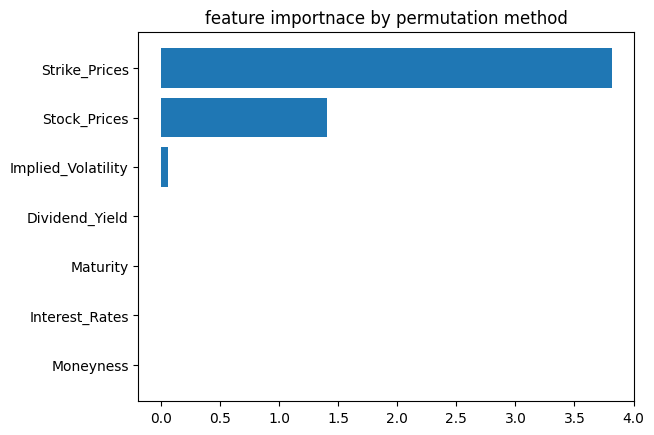

In [ ]:
from scikeras.wrappers import KerasClassifier, KerasRegressor
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#feeature importance model NN1


my_model = KerasRegressor(model = ann1, batch_size=32, verbose=False)
my_model.fit(X_train,y_train)

perm = PermutationImportance(my_model, random_state=1).fit(X_train,y_train)

eli5.show_weights(perm, feature_names = X.columns.tolist())
df_fi = pd.DataFrame(dict(feature_names=X.columns.tolist(),
                          feat_imp=perm.feature_importances_,
                          std=perm.feature_importances_std_,
                          ))
df_sorted = df_fi.sort_values('feat_imp')
plt.barh('feature_names', 'feat_imp', data=df_sorted)
plt.title('feature importnace by permutation method')

plt.show()



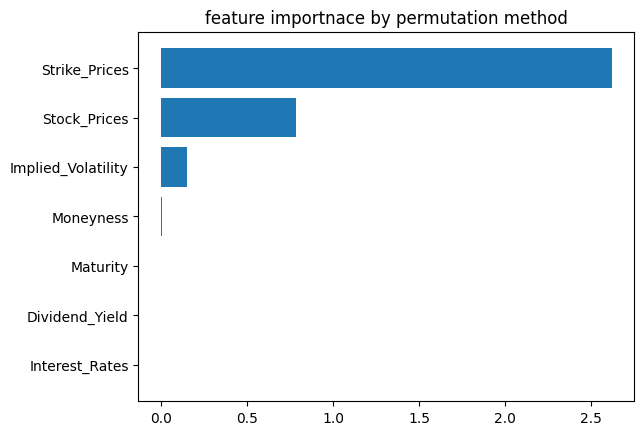

In [ ]:
#feeature importance model NN2

my_model = KerasRegressor(model = ann2, batch_size=32, verbose=False)
my_model.fit(X_train,y_train)

perm = PermutationImportance(my_model, random_state=1).fit(X_train,y_train)

eli5.show_weights(perm, feature_names = X.columns.tolist())
df_fi = pd.DataFrame(dict(feature_names=X.columns.tolist(),
                          feat_imp=perm.feature_importances_,
                          std=perm.feature_importances_std_,
                          ))
df_sorted = df_fi.sort_values('feat_imp')
plt.barh('feature_names', 'feat_imp', data=df_sorted)
plt.title('feature importnace by permutation method')

plt.show()

<ipython-input-114-febad5306c11>:11: DeprecationWarning: Please use `gaussian_filter1d` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter1d


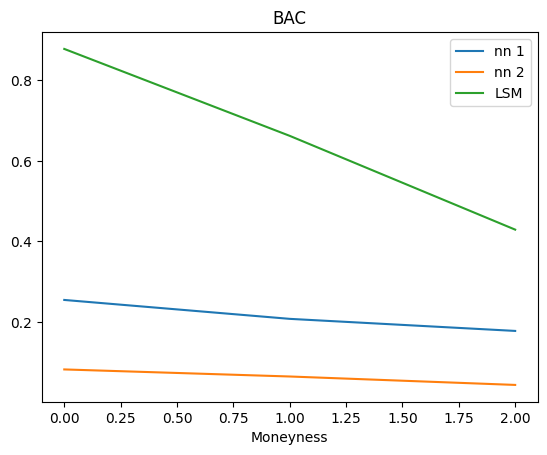

In [ ]:
import math

y_nn1_BAC = [rmse_BAC_nn1_ITM,rmse_BAC_nn1_ATM,rmse_BAC_nn1_OTM]
y_nn2_BAC = [rmse_BAC_nn2_ITM,rmse_BAC_nn2_ATM,rmse_BAC_nn2_OTM]
y_lsm_BAC = [rmse_BAC_lsm_ITM,rmse_BAC_lsm_ATM,rmse_BAC_lsm_OTM]


x = [2 , 1 , 0]

plt.title("BAC")
from scipy.ndimage.filters import gaussian_filter1d
y_smooth_nn1_BAC = gaussian_filter1d(y_nn1_BAC, sigma = 0.9)
y_smooth_nn2_BAC = gaussian_filter1d(y_nn2_BAC, sigma = 0.9)
y_smooth_lsm_BAC = gaussian_filter1d(y_lsm_BAC, sigma = 0.9)

plt.plot(x, y_smooth_nn1_BAC, label = "nn 1", linestyle="-")
plt.plot(x, y_smooth_nn2_BAC, label = "nn 2", linestyle="-")
plt.plot(x, y_smooth_lsm_BAC, label = "LSM", linestyle="-")
plt.xlabel("Moneyness")
plt.legend()
plt.show()




<ipython-input-115-b488bc9d22de>:11: DeprecationWarning: Please use `gaussian_filter1d` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter1d


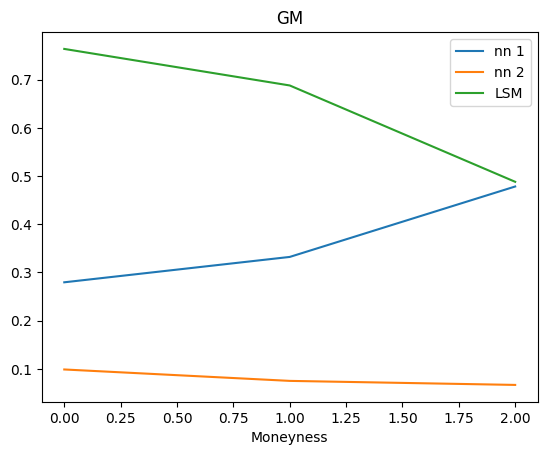

In [ ]:
import math

y_nn1_GM = [rmse_GM_nn1_ITM,rmse_GM_nn1_ATM,rmse_GM_nn1_OTM]
y_nn2_GM = [rmse_GM_nn2_ITM,rmse_GM_nn2_ATM,rmse_GM_nn2_OTM]
y_lsm_GM = [rmse_GM_lsm_ITM,rmse_GM_lsm_ATM,rmse_GM_lsm_OTM]


x = [2 , 1 , 0]

plt.title("GM")
from scipy.ndimage.filters import gaussian_filter1d
y_smooth_nn1_GM = gaussian_filter1d(y_nn1_GM, sigma = 0.9)
y_smooth_nn2_GM = gaussian_filter1d(y_nn2_GM, sigma = 0.9)
y_smooth_lsm_GM = gaussian_filter1d(y_lsm_GM, sigma = 0.9)

plt.plot(x, y_smooth_nn1_GM, label = "nn 1", linestyle="-")
plt.plot(x, y_smooth_nn2_GM, label = "nn 2", linestyle="-")
plt.plot(x, y_smooth_lsm_GM, label = "LSM", linestyle="-")
plt.xlabel("Moneyness")
plt.legend()
plt.show()


<ipython-input-116-c618953833e6>:11: DeprecationWarning: Please use `gaussian_filter1d` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter1d


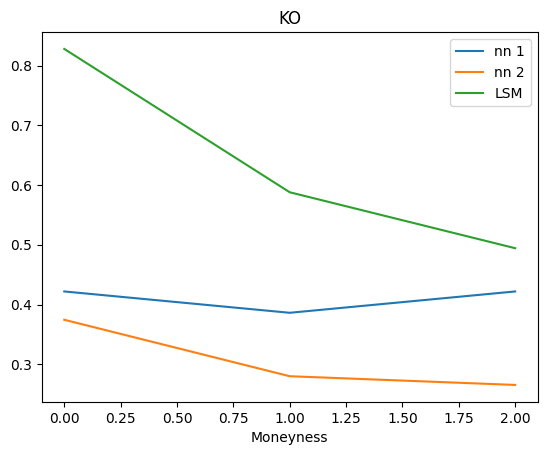

In [ ]:
import math

y_nn1_KO = [rmse_KO_nn1_ITM,rmse_KO_nn1_ATM,rmse_KO_nn1_OTM]
y_nn2_KO = [rmse_KO_nn2_ITM,rmse_KO_nn2_ATM,rmse_KO_nn2_OTM]
y_lsm_KO = [rmse_KO_lsm_ITM,rmse_KO_lsm_ATM,rmse_KO_lsm_OTM]


x = [2 , 1 , 0]

plt.title("KO")
from scipy.ndimage.filters import gaussian_filter1d
y_smooth_nn1_KO = gaussian_filter1d(y_nn1_KO, sigma = 0.9)
y_smooth_nn2_KO = gaussian_filter1d(y_nn2_KO, sigma = 0.9)
y_smooth_lsm_KO = gaussian_filter1d(y_lsm_KO, sigma = 0.9)

plt.plot(x, y_smooth_nn1_KO, label = "nn 1", linestyle="-")
plt.plot(x, y_smooth_nn2_KO, label = "nn 2", linestyle="-")
plt.plot(x, y_smooth_lsm_KO, label = "LSM", linestyle="-")
plt.xlabel("Moneyness")
plt.legend()
plt.show()




<ipython-input-117-5a05b610cfaa>:11: DeprecationWarning: Please use `gaussian_filter1d` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter1d


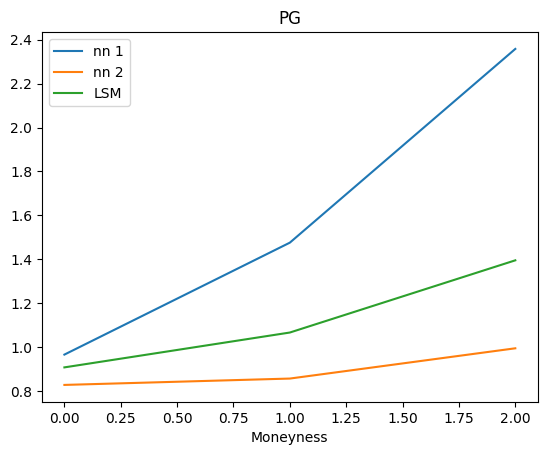

In [ ]:
import math

y_nn1_PG = [rmse_PG_nn1_ITM,rmse_PG_nn1_ATM,rmse_PG_nn1_OTM]
y_nn2_PG = [rmse_PG_nn2_ITM,rmse_PG_nn2_ATM,rmse_PG_nn2_OTM]
y_lsm_PG = [rmse_PG_lsm_ITM,rmse_PG_lsm_ATM,rmse_PG_lsm_OTM]


x = [2 , 1 , 0]

plt.title("PG")
from scipy.ndimage.filters import gaussian_filter1d
y_smooth_nn1_PG = gaussian_filter1d(y_nn1_PG, sigma = 0.9)
y_smooth_nn2_PG = gaussian_filter1d(y_nn2_PG, sigma = 0.9)
y_smooth_lsm_PG = gaussian_filter1d(y_lsm_PG, sigma = 0.9)

plt.plot(x, y_smooth_nn1_PG, label = "nn 1", linestyle="-")
plt.plot(x, y_smooth_nn2_PG, label = "nn 2", linestyle="-")
plt.plot(x, y_smooth_lsm_PG, label = "LSM", linestyle="-")
plt.xlabel("Moneyness")
plt.legend()
plt.show()




<ipython-input-118-f94c0e59505b>:11: DeprecationWarning: Please use `gaussian_filter1d` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter1d


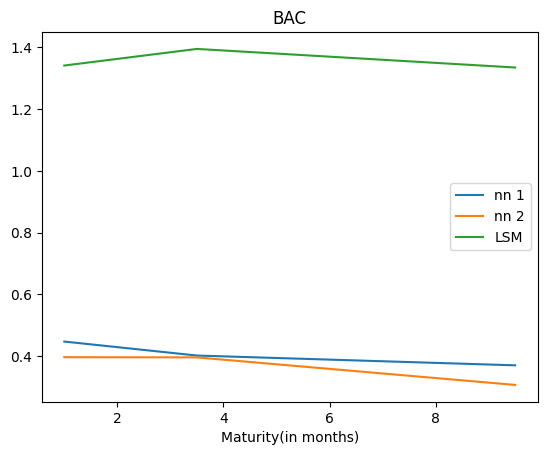

In [ ]:
import math

y_nn1_BAC = [rmse_BAC_nn1_less_than_one_month,rmse_BAC_nn1_one_month_to_six,rmse_BAC_nn1_more_than_six]
y_nn2_BAC = [rmse_BAC_nn2_less_than_one_month,rmse_BAC_nn2_one_month_to_six,rmse_BAC_nn2_more_than_six]
y_lsm_BAC = [rmse_BAC_lsm_less_than_one_month,rmse_BAC_lsm_one_month_to_six,rmse_BAC_lsm_more_than_six]


x = [1 , 3.5 , 9.5]

plt.title("BAC")
from scipy.ndimage.filters import gaussian_filter1d
y_smooth_nn1_BAC = gaussian_filter1d(y_nn1_BAC, sigma = 0.9)
y_smooth_nn2_BAC = gaussian_filter1d(y_nn2_BAC, sigma = 0.9)
y_smooth_lsm_BAC = gaussian_filter1d(y_lsm_BAC, sigma = 0.9)

plt.plot(x, y_smooth_nn1_BAC, label = "nn 1", linestyle="-")
plt.plot(x, y_smooth_nn2_BAC, label = "nn 2", linestyle="-")
plt.plot(x, y_smooth_lsm_BAC, label = "LSM", linestyle="-")
plt.xlabel("Maturity(in months)")
plt.legend()
plt.show()




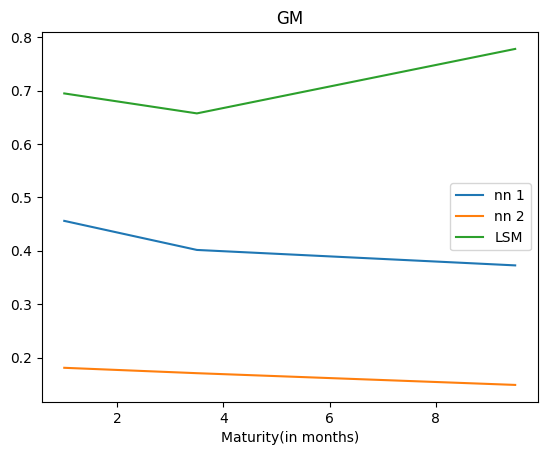

In [ ]:
y_nn1_GM = [rmse_GM_nn1_less_than_one_month,rmse_GM_nn1_one_month_to_six,rmse_GM_nn1_more_than_six]
y_nn2_GM = [rmse_GM_nn2_less_than_one_month,rmse_GM_nn2_one_month_to_six,rmse_GM_nn2_more_than_six]
y_lsm_GM = [rmse_GM_lsm_less_than_one_month,rmse_GM_lsm_one_month_to_six,rmse_GM_lsm_more_than_six]


x = [1 , 3.5 , 9.5]

plt.title("GM")
y_smooth_nn1_GM = gaussian_filter1d(y_nn1_GM, sigma = 0.9)
y_smooth_nn2_GM = gaussian_filter1d(y_nn2_GM, sigma = 0.9)
y_smooth_lsm_GM = gaussian_filter1d(y_lsm_GM, sigma = 0.9)

plt.plot(x, y_smooth_nn1_GM, label = "nn 1", linestyle="-")
plt.plot(x, y_smooth_nn2_GM, label = "nn 2", linestyle="-")
plt.plot(x, y_smooth_lsm_GM, label = "LSM", linestyle="-")
plt.xlabel("Maturity(in months)")
plt.legend()
plt.show()

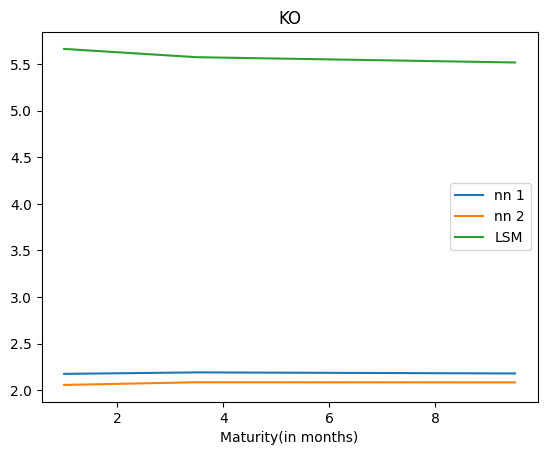

In [ ]:
y_nn1_KO = [rmse_KO_nn1_less_than_one_month,rmse_KO_nn1_one_month_to_six,rmse_KO_nn1_more_than_six]
y_nn2_KO = [rmse_KO_nn2_less_than_one_month,rmse_KO_nn2_one_month_to_six,rmse_KO_nn2_more_than_six]
y_lsm_KO = [rmse_KO_lsm_less_than_one_month,rmse_KO_lsm_one_month_to_six,rmse_KO_lsm_more_than_six]


x = [1 , 3.5 , 9.5]

plt.title("KO")
y_smooth_nn1_KO = gaussian_filter1d(y_nn1_KO, sigma = 1.2)
y_smooth_nn2_KO = gaussian_filter1d(y_nn2_KO, sigma = 1.2)
y_smooth_lsm_KO = gaussian_filter1d(y_lsm_KO, sigma = 1.2)

plt.plot(x, y_smooth_nn1_KO, label = "nn 1", linestyle="-")
plt.plot(x, y_smooth_nn2_KO, label = "nn 2", linestyle="-")
plt.plot(x, y_smooth_lsm_KO, label = "LSM", linestyle="-")
plt.xlabel("Maturity(in months)")
plt.legend()
plt.show()

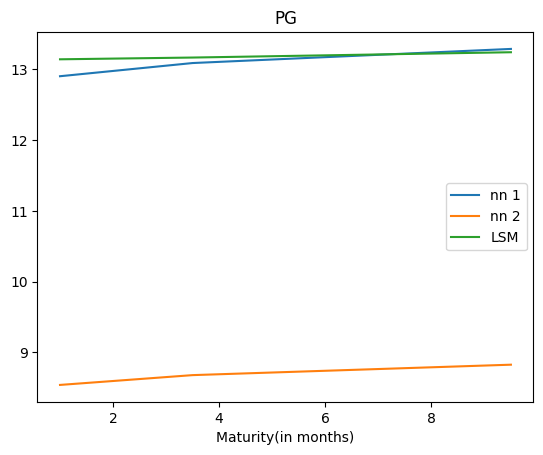

In [ ]:
y_nn1_PG = [rmse_PG_nn1_less_than_one_month,rmse_PG_nn1_one_month_to_six,rmse_PG_nn1_more_than_six]
y_nn2_PG = [rmse_PG_nn2_less_than_one_month,rmse_PG_nn2_one_month_to_six,rmse_PG_nn2_more_than_six]
y_lsm_PG = [rmse_PG_lsm_less_than_one_month,rmse_PG_lsm_one_month_to_six,rmse_PG_lsm_more_than_six]


x = [1 , 3.5 , 9.5]

plt.title("PG")
y_smooth_nn1_PG = gaussian_filter1d(y_nn1_PG, sigma = 1.2)
y_smooth_nn2_PG = gaussian_filter1d(y_nn2_PG, sigma = 1.2)
y_smooth_lsm_PG = gaussian_filter1d(y_lsm_PG, sigma = 1.2)

plt.plot(x, y_smooth_nn1_PG, label = "nn 1", linestyle="-")
plt.plot(x, y_smooth_nn2_PG, label = "nn 2", linestyle="-")
plt.plot(x, y_smooth_lsm_PG, label = "LSM", linestyle="-")
plt.xlabel("Maturity(in months)")
plt.legend()
plt.show()

In [ ]:
# Calculate RMSE for different maturities and different Companies

In [ ]:
def compute_rrmse(rmse, target_range):
    rrmse = rmse / abs(target_range)
    return rrmse
def compute_target_range(target):
  return max((max(target) - min(target)),0.01)

In [ ]:
def relative_root_mean_squared_error(true, pred):
    num = np.sum(np.square(true - pred))
    den = np.sum(np.square(pred))
    squared_error = num/den
    rrmse_loss = np.sqrt(squared_error)
    return rrmse_loss

In [ ]:
rrmse_BAC_nn1_less_than_one_month = relative_root_mean_squared_error(y_BAC_less_one_month,ann1.predict(X_BAC_less_one_month,verbose = 0)[: ,-1])
rrmse_BAC_nn1_one_month_to_six = relative_root_mean_squared_error(y_BAC_one_month_to_six,ann1.predict(X_BAC_one_month_to_six,verbose = 0)[: ,-1])
rrmse_BAC_nn1_more_than_six = relative_root_mean_squared_error(y_BAC_more_than_six,ann1.predict(X_BAC_more_than_six,verbose = 0)[: ,-1])


rrmse_BAC_nn2_less_than_one_month = relative_root_mean_squared_error(y_BAC_less_one_month,ann2.predict(X_BAC_less_one_month,verbose = 0)[: ,-1])
rrmse_BAC_nn2_one_month_to_six = relative_root_mean_squared_error(y_BAC_one_month_to_six,ann2.predict(X_BAC_one_month_to_six,verbose = 0)[: ,-1])
rrmse_BAC_nn2_more_than_six = relative_root_mean_squared_error(y_BAC_more_than_six,ann2.predict(X_BAC_more_than_six,verbose = 0)[: ,-1])

rrmse_BAC_lsm_less_than_one_month = relative_root_mean_squared_error(y_BAC_less_one_month,y_pred_BAC_less_one_month)
rrmse_BAC_lsm_one_month_to_six = relative_root_mean_squared_error(y_BAC_one_month_to_six,y_pred_BAC_one_month_to_six)
rrmse_BAC_lsm_more_than_six = relative_root_mean_squared_error(y_BAC_more_than_six,y_pred_BAC_more_than_six)

In [ ]:
rrmse_GM_nn1_less_than_one_month = relative_root_mean_squared_error(y_GM_less_one_month,ann1.predict(X_GM_less_one_month,verbose = 0)[: ,-1])
rrmse_GM_nn1_one_month_to_six = relative_root_mean_squared_error(y_GM_one_month_to_six,ann1.predict(X_GM_one_month_to_six,verbose = 0)[: ,-1])
rrmse_GM_nn1_more_than_six = relative_root_mean_squared_error(y_GM_more_than_six,ann1.predict(X_GM_more_than_six,verbose = 0)[: ,-1])


rrmse_GM_nn2_less_than_one_month = relative_root_mean_squared_error(y_GM_less_one_month,ann2.predict(X_GM_less_one_month,verbose = 0)[: ,-1])
rrmse_GM_nn2_one_month_to_six = relative_root_mean_squared_error(y_GM_one_month_to_six,ann2.predict(X_GM_one_month_to_six,verbose = 0)[: ,-1])
rrmse_GM_nn2_more_than_six = relative_root_mean_squared_error(y_GM_more_than_six,ann2.predict(X_GM_more_than_six,verbose = 0)[: ,-1])

rrmse_GM_lsm_less_than_one_month = relative_root_mean_squared_error(y_GM_less_one_month,y_pred_GM_less_one_month)
rrmse_GM_lsm_one_month_to_six = relative_root_mean_squared_error(y_GM_one_month_to_six,y_pred_GM_one_month_to_six)
rrmse_GM_lsm_more_than_six = relative_root_mean_squared_error(y_GM_more_than_six,y_pred_GM_more_than_six)

In [ ]:
rrmse_KO_nn1_less_than_one_month = relative_root_mean_squared_error(y_KO_less_one_month,ann1.predict(X_KO_less_one_month,verbose = 0)[: ,-1])
rrmse_KO_nn1_one_month_to_six = relative_root_mean_squared_error(y_KO_one_month_to_six,ann1.predict(X_KO_one_month_to_six,verbose = 0)[: ,-1])
rrmse_KO_nn1_more_than_six = relative_root_mean_squared_error(y_KO_more_than_six,ann1.predict(X_KO_more_than_six,verbose = 0)[: ,-1])


rrmse_KO_nn2_less_than_one_month = relative_root_mean_squared_error(y_KO_less_one_month,ann2.predict(X_KO_less_one_month,verbose = 0)[: ,-1])
rrmse_KO_nn2_one_month_to_six = relative_root_mean_squared_error(y_KO_one_month_to_six,ann2.predict(X_KO_one_month_to_six,verbose = 0)[: ,-1])
rrmse_KO_nn2_more_than_six = relative_root_mean_squared_error(y_KO_more_than_six,ann2.predict(X_KO_more_than_six,verbose = 0)[: ,-1])

rrmse_KO_lsm_less_than_one_month = relative_root_mean_squared_error(y_KO_less_one_month,y_pred_KO_less_one_month)
rrmse_KO_lsm_one_month_to_six = relative_root_mean_squared_error(y_KO_one_month_to_six,y_pred_KO_one_month_to_six)
rrmse_KO_lsm_more_than_six = relative_root_mean_squared_error(y_KO_more_than_six,y_pred_KO_more_than_six)

In [ ]:
rrmse_PG_nn1_less_than_one_month = relative_root_mean_squared_error(y_PG_less_one_month,ann1.predict(X_PG_less_one_month,verbose = 0)[: ,-1])
rrmse_PG_nn1_one_month_to_six = relative_root_mean_squared_error(y_PG_one_month_to_six,ann1.predict(X_PG_one_month_to_six,verbose = 0)[: ,-1])
rrmse_PG_nn1_more_than_six = relative_root_mean_squared_error(y_PG_more_than_six,ann1.predict(X_PG_more_than_six,verbose = 0)[: ,-1])


rrmse_PG_nn2_less_than_one_month = relative_root_mean_squared_error(y_PG_less_one_month,ann2.predict(X_PG_less_one_month,verbose = 0)[: ,-1])
rrmse_PG_nn2_one_month_to_six = relative_root_mean_squared_error(y_PG_one_month_to_six,ann2.predict(X_PG_one_month_to_six,verbose = 0)[: ,-1])
rrmse_PG_nn2_more_than_six = relative_root_mean_squared_error(y_PG_more_than_six,ann2.predict(X_PG_more_than_six,verbose = 0)[: ,-1])

rrmse_PG_lsm_less_than_one_month = relative_root_mean_squared_error(y_PG_less_one_month,y_pred_PG_less_one_month)
rrmse_PG_lsm_one_month_to_six = relative_root_mean_squared_error(y_PG_one_month_to_six,y_pred_PG_one_month_to_six)
rrmse_PG_lsm_more_than_six = relative_root_mean_squared_error(y_PG_more_than_six,y_pred_PG_more_than_six)

In [ ]:
# Calculate RMSE for different maturities and different Companies

In [ ]:
rrmse_BAC_nn1_ITM = relative_root_mean_squared_error(y_BAC_ITM,ann1.predict(X_BAC_ITM,verbose = 0)[: ,-1])
rrmse_BAC_nn1_ATM = relative_root_mean_squared_error(y_BAC_ATM,ann1.predict(X_BAC_ATM,verbose = 0)[: ,-1])
rrmse_BAC_nn1_OTM = relative_root_mean_squared_error(y_BAC_OTM,ann1.predict(X_BAC_OTM,verbose = 0)[: ,-1])

rrmse_BAC_nn2_ITM = relative_root_mean_squared_error(y_BAC_ITM,ann2.predict(X_BAC_ITM,verbose = 0)[: ,-1])
rrmse_BAC_nn2_ATM = relative_root_mean_squared_error(y_BAC_ATM,ann2.predict(X_BAC_ATM,verbose = 0)[: ,-1])
rrmse_BAC_nn2_OTM = relative_root_mean_squared_error(y_BAC_OTM,ann2.predict(X_BAC_OTM,verbose = 0)[: ,-1])

rrmse_BAC_lsm_ITM = relative_root_mean_squared_error(y_BAC_ITM,y_pred_BAC_ITM)
rrmse_BAC_lsm_ATM = relative_root_mean_squared_error(y_BAC_ATM,y_pred_BAC_ATM)
rrmse_BAC_lsm_OTM = relative_root_mean_squared_error(y_BAC_OTM,y_pred_BAC_OTM)




In [ ]:
rrmse_GM_nn1_ITM = relative_root_mean_squared_error(y_GM_ITM,ann1.predict(X_GM_ITM,verbose = 0)[: ,-1])
rrmse_GM_nn1_ATM = relative_root_mean_squared_error(y_GM_ATM,ann1.predict(X_GM_ATM,verbose = 0)[: ,-1])
rrmse_GM_nn1_OTM = relative_root_mean_squared_error(y_GM_OTM,ann1.predict(X_GM_OTM,verbose = 0)[: ,-1])

rrmse_GM_nn2_ITM = relative_root_mean_squared_error(y_GM_ITM,ann2.predict(X_GM_ITM,verbose = 0)[: ,-1])
rrmse_GM_nn2_ATM = relative_root_mean_squared_error(y_GM_ATM,ann2.predict(X_GM_ATM,verbose = 0)[: ,-1])
rrmse_GM_nn2_OTM = relative_root_mean_squared_error(y_GM_OTM,ann2.predict(X_GM_OTM,verbose = 0)[: ,-1])

rrmse_GM_lsm_ITM = relative_root_mean_squared_error(y_GM_ITM,y_pred_GM_ITM)
rrmse_GM_lsm_ATM = relative_root_mean_squared_error(y_GM_ATM,y_pred_GM_ATM)
rrmse_GM_lsm_OTM = relative_root_mean_squared_error(y_GM_OTM,y_pred_GM_OTM)


In [ ]:
rrmse_KO_nn1_ITM = relative_root_mean_squared_error(y_KO_ITM,ann1.predict(X_KO_ITM,verbose = 0)[: ,-1])
rrmse_KO_nn1_ATM = relative_root_mean_squared_error(y_KO_ATM,ann1.predict(X_KO_ATM,verbose = 0)[: ,-1])
rrmse_KO_nn1_OTM = relative_root_mean_squared_error(y_KO_OTM,ann1.predict(X_KO_OTM,verbose = 0)[: ,-1])

rrmse_KO_nn2_ITM = relative_root_mean_squared_error(y_KO_ITM,ann2.predict(X_KO_ITM,verbose = 0)[: ,-1])
rrmse_KO_nn2_ATM = relative_root_mean_squared_error(y_KO_ATM,ann2.predict(X_KO_ATM,verbose = 0)[: ,-1])
rrmse_KO_nn2_OTM = relative_root_mean_squared_error(y_KO_OTM,ann2.predict(X_KO_OTM,verbose = 0)[: ,-1])

rrmse_KO_lsm_ITM = relative_root_mean_squared_error(y_KO_ITM,y_pred_KO_ITM)
rrmse_KO_lsm_ATM = relative_root_mean_squared_error(y_KO_ATM,y_pred_KO_ATM)
rrmse_KO_lsm_OTM = relative_root_mean_squared_error(y_KO_OTM,y_pred_KO_OTM)


In [ ]:
rrmse_PG_nn1_ITM = relative_root_mean_squared_error(y_PG_ITM,ann1.predict(X_PG_ITM,verbose = 0)[: ,-1])
rrmse_PG_nn1_ATM = relative_root_mean_squared_error(y_PG_ATM,ann1.predict(X_PG_ATM,verbose = 0)[: ,-1])
rrmse_PG_nn1_OTM = relative_root_mean_squared_error(y_PG_OTM,ann1.predict(X_PG_OTM,verbose = 0)[: ,-1])

rrmse_PG_nn2_ITM = relative_root_mean_squared_error(y_PG_ITM,ann2.predict(X_PG_ITM,verbose = 0)[: ,-1])
rrmse_PG_nn2_ATM = relative_root_mean_squared_error(y_PG_ATM,ann2.predict(X_PG_ATM,verbose = 0)[: ,-1])
rrmse_PG_nn2_OTM = relative_root_mean_squared_error(y_PG_OTM,ann2.predict(X_PG_OTM,verbose = 0)[: ,-1])

rrmse_PG_lsm_ITM = relative_root_mean_squared_error(y_PG_ITM,y_pred_PG_ITM)
rrmse_PG_lsm_ATM = relative_root_mean_squared_error(y_PG_ATM,y_pred_PG_ATM)
rrmse_PG_lsm_OTM = relative_root_mean_squared_error(y_PG_OTM,y_pred_PG_OTM)


In [ ]:
myTable = PrettyTable(["","NN model 1", "NN model 2", "LSM"])
print('RRMSE per company (ITM)')
myTable.add_row(["BAC",rrmse_BAC_nn1_ITM, rrmse_BAC_nn2_ITM,rrmse_BAC_lsm_ITM ])
myTable.add_row(["GM",rrmse_GM_nn1_ITM, rrmse_GM_nn2_ITM,rrmse_GM_lsm_ITM ])
myTable.add_row(["KO",rrmse_KO_nn1_ITM, rrmse_KO_nn2_ITM,rrmse_KO_lsm_ITM ])
myTable.add_row(["PG",rrmse_PG_nn1_ITM, rrmse_PG_nn2_ITM,rrmse_PG_lsm_ITM ])

print(myTable)

RRMSE per company (ITM)
+-----+------------+------------+------+
|     | NN model 1 | NN model 2 | LSM  |
+-----+------------+------------+------+
| BAC |    0.03    |    0.03    | 0.17 |
|  GM |    0.05    |    0.13    | 0.11 |
|  KO |    0.08    |    0.07    | 0.11 |
|  PG |    0.08    |    0.05    | 0.07 |
+-----+------------+------------+------+


In [ ]:
myTable = PrettyTable(["","NN model 1", "NN model 2", "LSM"])
print('RRMSE per company (ATM)')
myTable.add_row(["BAC",rrmse_BAC_nn1_ATM, rrmse_BAC_nn2_ATM,rrmse_BAC_lsm_ATM ])
myTable.add_row(["GM",rrmse_GM_nn1_ATM, rrmse_GM_nn2_ATM,rrmse_GM_lsm_ATM ])
myTable.add_row(["KO",rrmse_KO_nn1_ATM, rrmse_KO_nn2_ATM,rrmse_KO_lsm_ATM ])
myTable.add_row(["PG",rrmse_PG_nn1_ATM, rrmse_PG_nn2_ATM,rrmse_PG_lsm_ATM ])

print(myTable)

RRMSE per company (ATM)
+-----+------------+------------+------+
|     | NN model 1 | NN model 2 | LSM  |
+-----+------------+------------+------+
| BAC |    0.27    |    0.12    | 0.28 |
|  GM |    0.22    |    0.06    | 0.28 |
|  KO |    0.21    |    0.05    | 0.38 |
|  PG |    0.17    |    0.11    | 0.25 |
+-----+------------+------------+------+


In [ ]:
myTable = PrettyTable(["","NN model 1", "NN model 2", "LSM"])
print('RRMSE per company (OTM)')
myTable.add_row(["BAC",round(rrmse_BAC_nn1_OTM,2), round(rrmse_BAC_nn2_OTM,2),round(rrmse_BAC_lsm_OTM,2) ])
myTable.add_row(["GM",round(rrmse_GM_nn1_OTM,2), round(rrmse_GM_nn2_OTM,2),round(rrmse_GM_lsm_OTM,2) ])
myTable.add_row(["KO",round(rrmse_KO_nn1_OTM,2), round(rrmse_KO_nn2_OTM,2),round(rrmse_KO_lsm_OTM,2) ])
myTable.add_row(["PG",round(rrmse_PG_nn1_OTM,2), round(rrmse_PG_nn2_OTM,2),round(rrmse_PG_lsm_OTM,2) ])

print(myTable)

RRMSE per company (OTM)
+-----+------------+------------+------+
|     | NN model 1 | NN model 2 | LSM  |
+-----+------------+------------+------+
| BAC |    0.29    |    0.23    | 0.47 |
|  GM |    0.21    |    0.2     | 0.48 |
|  KO |    0.19    |    0.17    | 0.34 |
|  PG |    0.31    |    0.3     | 0.3  |
+-----+------------+------------+------+


In [ ]:
myTable = PrettyTable(["","NN model 1", "NN model 2", "LSM"])
print('RRMSE per company (<1month)')
myTable.add_row(["BAC",rrmse_BAC_nn1_less_than_one_month, rrmse_BAC_nn2_less_than_one_month,rrmse_BAC_lsm_less_than_one_month ])
myTable.add_row(["GM",rrmse_GM_nn1_less_than_one_month, rrmse_GM_nn2_less_than_one_month,rrmse_GM_lsm_less_than_one_month ])
myTable.add_row(["KO",rrmse_KO_nn1_less_than_one_month, rrmse_KO_nn2_less_than_one_month,rrmse_KO_lsm_less_than_one_month ])
myTable.add_row(["PG",rrmse_PG_nn1_less_than_one_month, rrmse_PG_nn2_less_than_one_month,rrmse_PG_lsm_less_than_one_month ])

print(myTable)

RRMSE per company (<1month)
+-----+------------+------------+------+
|     | NN model 1 | NN model 2 | LSM  |
+-----+------------+------------+------+
| BAC |    0.18    |    0.13    | 0.25 |
|  GM |    0.14    |    0.08    | 0.26 |
|  KO |    0.11    |    0.07    | 0.18 |
|  PG |    0.15    |    0.1     | 0.15 |
+-----+------------+------------+------+


In [ ]:
myTable = PrettyTable(["","NN model 1", "NN model 2", "LSM"])
print('RRMSE per company (1-6 months)')
myTable.add_row(["BAC",round(rrmse_BAC_nn1_one_month_to_six,2),round(rrmse_BAC_nn2_one_month_to_six,2),round(rrmse_BAC_lsm_one_month_to_six,2) ])
myTable.add_row(["GM",round(rrmse_GM_nn1_one_month_to_six,2),round(rrmse_GM_nn2_one_month_to_six,2),round(rrmse_GM_lsm_one_month_to_six,2) ])
myTable.add_row(["KO",round(rrmse_KO_nn1_one_month_to_six,2),round(rrmse_KO_nn2_one_month_to_six,2),round(rrmse_KO_lsm_one_month_to_six,2) ])
myTable.add_row(["PG",round(rrmse_PG_nn1_one_month_to_six,2),round(rrmse_PG_nn2_one_month_to_six,2),round(rrmse_PG_lsm_one_month_to_six,2) ])

print(myTable)

RRMSE per company (1-6 months)
+-----+------------+------------+------+
|     | NN model 1 | NN model 2 | LSM  |
+-----+------------+------------+------+
| BAC |    0.2     |    0.12    | 0.24 |
|  GM |    0.15    |    0.1     | 0.25 |
|  KO |    0.13    |    0.08    | 0.17 |
|  PG |    0.2     |    0.15    | 0.15 |
+-----+------------+------------+------+


In [ ]:
myTable = PrettyTable(["","NN model 1", "NN model 2", "LSM"])
print('RRMSE per company (>6 months)')
myTable.add_row(["BAC",rrmse_BAC_nn1_more_than_six, rrmse_BAC_nn2_more_than_six,rrmse_BAC_lsm_more_than_six ])
myTable.add_row(["GM",rrmse_GM_nn1_more_than_six, rrmse_GM_nn2_more_than_six,rrmse_GM_lsm_more_than_six ])
myTable.add_row(["KO",rrmse_KO_nn1_more_than_six, rrmse_KO_nn2_more_than_six,rrmse_KO_lsm_more_than_six ])
myTable.add_row(["PG",rrmse_PG_nn1_more_than_six, rrmse_PG_nn2_more_than_six,rrmse_PG_lsm_more_than_six ])

print(myTable)

RRMSE per company (>6 months)
+-----+------------+------------+------+
|     | NN model 1 | NN model 2 | LSM  |
+-----+------------+------------+------+
| BAC |    0.21    |    0.11    | 0.24 |
|  GM |    0.14    |    0.12    | 0.25 |
|  KO |    0.12    |    0.1     | 0.34 |
|  PG |    0.23    |    0.16    | 0.31 |
+-----+------------+------------+------+


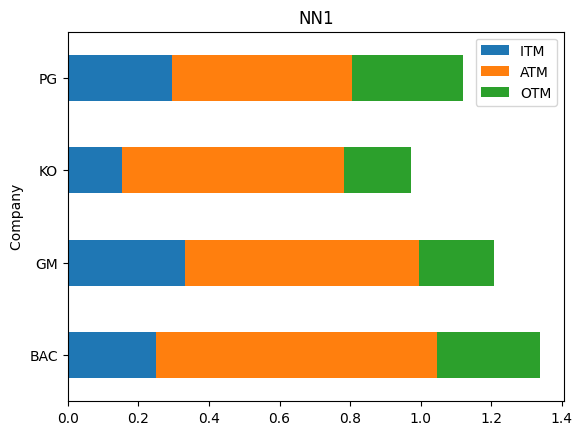

In [ ]:
#NN1 moneyness relative chart
df = pd.DataFrame([['BAC', rrmse_BAC_nn1_ITM, rrmse_BAC_nn1_ATM, rrmse_BAC_nn1_OTM], ['GM', rrmse_GM_nn1_ITM, rrmse_GM_nn1_ATM, rrmse_GM_nn1_OTM]
                   , ['KO', rrmse_KO_nn1_ITM, rrmse_KO_nn1_ATM, rrmse_KO_nn1_OTM],
                   ['PG', rrmse_PG_nn1_ITM, rrmse_PG_nn1_ATM, rrmse_PG_nn1_OTM]],
                  columns=['‌Company','‌ITM', 'ATM', 'OTM'])

df.plot(x = '‌Company',kind='barh', stacked=True, title='NN1')
plt.show()

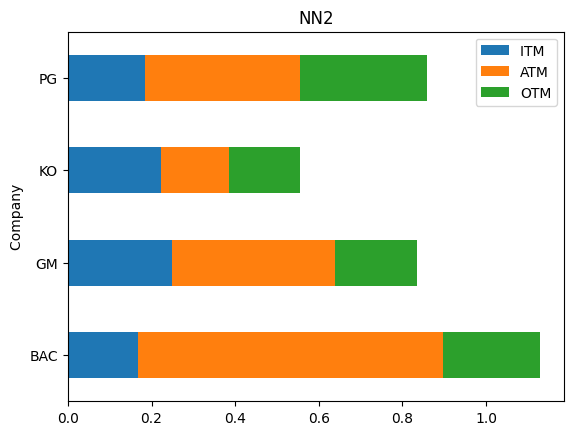

In [ ]:
#NN2 moneyness relative chart
df = pd.DataFrame([['BAC', rrmse_BAC_nn2_ITM, rrmse_BAC_nn2_ATM, rrmse_BAC_nn2_OTM], ['GM', rrmse_GM_nn2_ITM, rrmse_GM_nn2_ATM, rrmse_GM_nn2_OTM]
                   , ['KO', rrmse_KO_nn2_ITM, rrmse_KO_nn2_ATM, rrmse_KO_nn2_OTM],
                   ['PG', rrmse_PG_nn2_ITM, rrmse_PG_nn2_ATM, rrmse_PG_nn2_OTM]],
                  columns=['‌Company','‌ITM', 'ATM', 'OTM'])

df.plot(x = '‌Company',kind='barh', stacked=True, title='NN2')
plt.show()

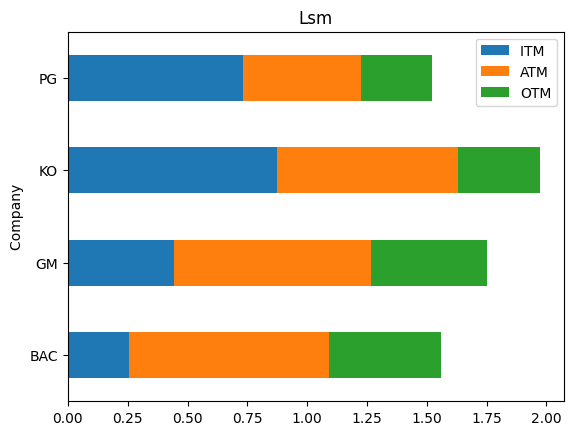

In [ ]:
#lsm moneyness relative chart
df = pd.DataFrame([['BAC', rrmse_BAC_lsm_ITM, rrmse_BAC_lsm_ATM, rrmse_BAC_lsm_OTM], ['GM', rrmse_GM_lsm_ITM, rrmse_GM_lsm_ATM, rrmse_GM_lsm_OTM]
                   , ['KO', rrmse_KO_lsm_ITM, rrmse_KO_lsm_ATM, rrmse_KO_lsm_OTM],
                   ['PG', rrmse_PG_lsm_ITM, rrmse_PG_lsm_ATM, rrmse_PG_lsm_OTM]],
                  columns=['‌Company','‌ITM', 'ATM', 'OTM'])

df.plot(x = '‌Company',kind='barh', stacked=True, title='Lsm')
plt.show()

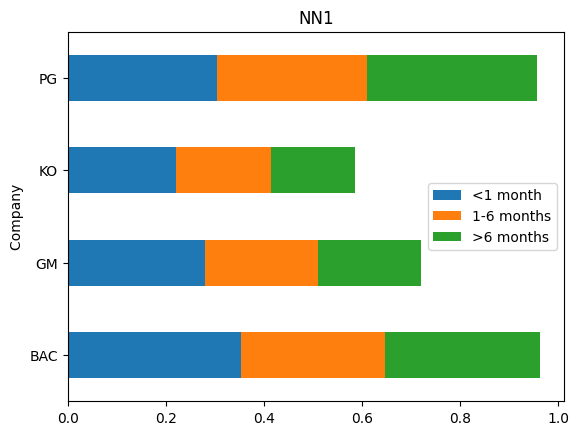

In [ ]:
#nn1 moneyness relative chart
df = pd.DataFrame([['BAC', rrmse_BAC_nn1_less_than_one_month, rrmse_BAC_nn1_one_month_to_six, rrmse_BAC_nn1_more_than_six], ['GM', rrmse_GM_nn1_less_than_one_month, rrmse_GM_nn1_one_month_to_six, rrmse_GM_nn1_more_than_six]
                   , ['KO', rrmse_KO_nn1_less_than_one_month, rrmse_KO_nn1_one_month_to_six, rrmse_KO_nn1_more_than_six],
                   ['PG', rrmse_PG_nn1_less_than_one_month, rrmse_PG_nn1_one_month_to_six, rrmse_PG_nn1_more_than_six]],
                  columns=['‌Company','‌<1 month', '1-6 months', '>6 months'])

df.plot(x = '‌Company',kind='barh', stacked=True, title='NN1')
plt.show()

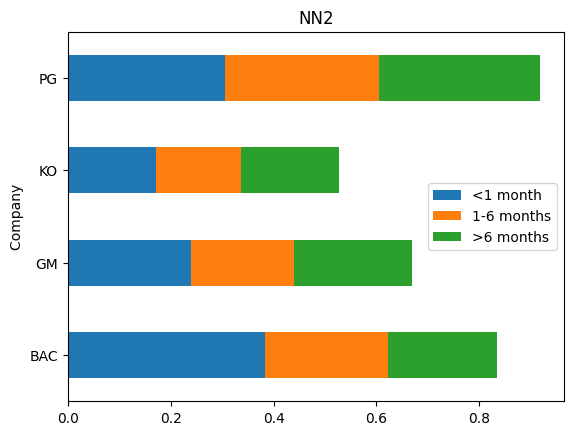

In [ ]:
#nn2 moneyness relative chart
df = pd.DataFrame([['BAC', rrmse_BAC_nn2_less_than_one_month, rrmse_BAC_nn2_one_month_to_six, rrmse_BAC_nn2_more_than_six], ['GM', rrmse_GM_nn2_less_than_one_month, rrmse_GM_nn2_one_month_to_six, rrmse_GM_nn2_more_than_six]
                   , ['KO', rrmse_KO_nn2_less_than_one_month, rrmse_KO_nn2_one_month_to_six, rrmse_KO_nn2_more_than_six],
                   ['PG', rrmse_PG_nn2_less_than_one_month, rrmse_PG_nn2_one_month_to_six, rrmse_PG_nn2_more_than_six]],
                  columns=['‌Company','‌<1 month', '1-6 months', '>6 months'])

df.plot(x = '‌Company',kind='barh', stacked=True, title='NN2')
plt.show()

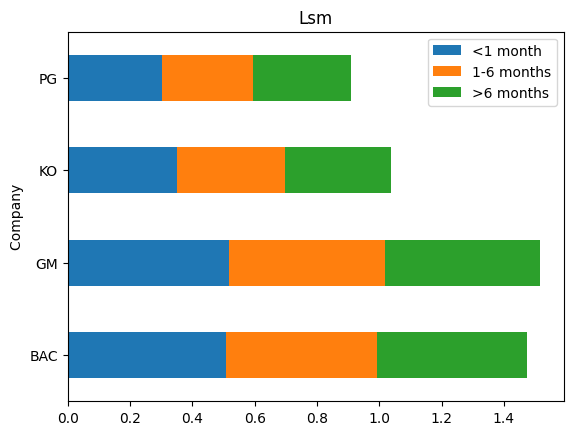

In [ ]:
#lsm moneyness relative chart
df = pd.DataFrame([['BAC', rrmse_BAC_lsm_less_than_one_month, rrmse_BAC_lsm_one_month_to_six, rrmse_BAC_lsm_more_than_six], ['GM', rrmse_GM_lsm_less_than_one_month, rrmse_GM_lsm_one_month_to_six, rrmse_GM_lsm_more_than_six]
                   , ['KO', rrmse_KO_lsm_less_than_one_month, rrmse_KO_lsm_one_month_to_six, rrmse_KO_lsm_more_than_six],
                   ['PG', rrmse_PG_lsm_less_than_one_month, rrmse_PG_lsm_one_month_to_six, rrmse_PG_lsm_more_than_six]],
                  columns=['‌Company','‌<1 month', '1-6 months', '>6 months'])

df.plot(x = '‌Company',kind='barh', stacked=True, title='Lsm')
plt.show()